done

In [1]:
ARCHITECTURE = 'cnn'
EXPERIMENT_TYPE = 'fixed-eps'
ITERATIONS = 10

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm
import foolbox as fb
import random
import json
import tensorflow_datasets as tfds

from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method, carlini_wagner_l2


#tf.compat.v1.enable_eager_execution()
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 4.5)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [13]:
run_experiment(
    structure='unstructured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5942 - accuracy: 0.8895 - val_loss: 1.5135 - val_accuracy: 0.9542
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5051 - accuracy: 0.9604 - val_loss: 1.4992 - val_accuracy: 0.9645
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4914 - accuracy: 0.9721 - val_loss: 1.4888 - val_accuracy: 0.9734
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9785 - val_loss: 1.4832 - val_accuracy: 0.9793
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4810 - accuracy: 0.9816 - val_loss: 1.4835 - val_accuracy: 0.9790
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9837 - val_loss: 1.4826 - val_accuracy: 0.9789
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4771 - accuracy: 0.9850 - val_loss: 1.4789 - val_accuracy: 0.9832


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9930 - val_loss: 1.4745 - val_accuracy: 0.9877
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9934 - val_loss: 1.4743 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4672 - accuracy: 0.9943 - val_loss: 1.4755 - val_accuracy: 0.9862
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accuracy: 0.9942 - val_loss: 1.4742 - val_accuracy: 0.9872
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9935 - val_loss: 1.4737 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9940 - val_loss: 1.4737 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accura


1it [02:40, 160.03s/it]

current pruning ratio is0.5, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4821 - accuracy: 0.9851 - val_loss: 1.4774 - val_accuracy: 0.9868
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4726 - accuracy: 0.9911 - val_loss: 1.4746 - val_accuracy: 0.9885
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9929 - val_loss: 1.4754 - val_accuracy: 0.9875
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9944 - val_loss: 1.4737 - val_accuracy: 0.9891
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9948 - val_loss: 1.4748 - val_accuracy: 0.9880
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9949 - val_loss: 1.4747 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4666 - accura


2it [05:26, 161.99s/it]

current pruning ratio is0.75, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5220 - accuracy: 0.9595 - val_loss: 1.4906 - val_accuracy: 0.9773
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4849 - accuracy: 0.9821 - val_loss: 1.4834 - val_accuracy: 0.9819
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4792 - accuracy: 0.9862 - val_loss: 1.4784 - val_accuracy: 0.9863
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4760 - accuracy: 0.9886 - val_loss: 1.4767 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4740 - accuracy: 0.9898 - val_loss: 1.4757 - val_accuracy: 0.9879
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9913 - val_loss: 1.4750 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4711 - accur


3it [08:52, 175.30s/it]

current pruning ratio is0.875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5625 - accuracy: 0.9265 - val_loss: 1.5074 - val_accuracy: 0.9652
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5024 - accuracy: 0.9685 - val_loss: 1.4962 - val_accuracy: 0.9730
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4920 - accuracy: 0.9766 - val_loss: 1.4886 - val_accuracy: 0.9788
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4868 - accuracy: 0.9799 - val_loss: 1.4847 - val_accuracy: 0.9806
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4837 - accuracy: 0.9816 - val_loss: 1.4821 - val_accuracy: 0.9828
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9837 - val_loss: 1.4825 - val_accuracy: 0.9825
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4795 - accu


4it [11:59, 178.56s/it]

current pruning ratio is0.9375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.7464 - accuracy: 0.7466 - val_loss: 1.5756 - val_accuracy: 0.9057
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5655 - accuracy: 0.9128 - val_loss: 1.5440 - val_accuracy: 0.9295
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5413 - accuracy: 0.9319 - val_loss: 1.5297 - val_accuracy: 0.9407
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5280 - accuracy: 0.9426 - val_loss: 1.5191 - val_accuracy: 0.9490
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5193 - accuracy: 0.9498 - val_loss: 1.5130 - val_accuracy: 0.9561
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5130 - accuracy: 0.9553 - val_loss: 1.5090 - val_accuracy: 0.9586
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5082 - acc


5it [15:34, 189.75s/it]

current pruning ratio is0.96875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8963 - accuracy: 0.5901 - val_loss: 1.7099 - val_accuracy: 0.7778
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6893 - accuracy: 0.7900 - val_loss: 1.6590 - val_accuracy: 0.8157
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6595 - accuracy: 0.8145 - val_loss: 1.6448 - val_accuracy: 0.8286
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6468 - accuracy: 0.8240 - val_loss: 1.6345 - val_accuracy: 0.8356
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6392 - accuracy: 0.8299 - val_loss: 1.6295 - val_accuracy: 0.8391
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5999 - accuracy: 0.8715 - val_loss: 1.5595 - val_accuracy: 0.9138
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5601 - ac


6it [19:59, 212.07s/it]

current pruning ratio is0.984375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9506 - accuracy: 0.5164 - val_loss: 1.8129 - val_accuracy: 0.6621
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7852 - accuracy: 0.6907 - val_loss: 1.7508 - val_accuracy: 0.7240
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7442 - accuracy: 0.7313 - val_loss: 1.7215 - val_accuracy: 0.7529
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7193 - accuracy: 0.7573 - val_loss: 1.6993 - val_accuracy: 0.7784
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7016 - accuracy: 0.7746 - val_loss: 1.6876 - val_accuracy: 0.7881
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6903 - accuracy: 0.7838 - val_loss: 1.6774 - val_accuracy: 0.7962
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6822 - a


7it [23:53, 204.75s/it]
 10%|█         | 1/10 [24:41<3:42:13, 1481.53s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5943 - accuracy: 0.8880 - val_loss: 1.5120 - val_accuracy: 0.9543
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5018 - accuracy: 0.9632 - val_loss: 1.4935 - val_accuracy: 0.9691
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4900 - accuracy: 0.9736 - val_loss: 1.4879 - val_accuracy: 0.9753
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4851 - accuracy: 0.9775 - val_loss: 1.4834 - val_accuracy: 0.9785
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4809 - accuracy: 0.9813 - val_loss: 1.4826 - val_accuracy: 0.9794
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4786 - accuracy: 0.9836 - val_loss: 1.4789 - val_accuracy: 0.9836
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4767 - accuracy: 0.9856 - val_loss: 1.4792 - val_accuracy: 0.9825


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9928 - val_loss: 1.4762 - val_accuracy: 0.9849
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9929 - val_loss: 1.4753 - val_accuracy: 0.9862
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9932 - val_loss: 1.4773 - val_accuracy: 0.9836
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4683 - accuracy: 0.9933 - val_loss: 1.4771 - val_accuracy: 0.9840
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4674 - accuracy: 0.9941 - val_loss: 1.4759 - val_accuracy: 0.9856



1it [02:20, 140.96s/it]

current pruning ratio is0.5, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4817 - accuracy: 0.9853 - val_loss: 1.4787 - val_accuracy: 0.9846
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4730 - accuracy: 0.9909 - val_loss: 1.4767 - val_accuracy: 0.9858
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4704 - accuracy: 0.9925 - val_loss: 1.4750 - val_accuracy: 0.9876
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4694 - accuracy: 0.9930 - val_loss: 1.4747 - val_accuracy: 0.9877
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9940 - val_loss: 1.4753 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4679 - accuracy: 0.9944 - val_loss: 1.4740 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4672 - accura


2it [04:42, 141.18s/it]

current pruning ratio is0.75, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5160 - accuracy: 0.9657 - val_loss: 1.4897 - val_accuracy: 0.9794
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4842 - accuracy: 0.9827 - val_loss: 1.4833 - val_accuracy: 0.9824
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4786 - accuracy: 0.9866 - val_loss: 1.4782 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4757 - accuracy: 0.9887 - val_loss: 1.4763 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4731 - accuracy: 0.9907 - val_loss: 1.4755 - val_accuracy: 0.9874
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4720 - accuracy: 0.9915 - val_loss: 1.4748 - val_accuracy: 0.9884
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4707 - accur


3it [07:14, 144.42s/it]

current pruning ratio is0.875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5802 - accuracy: 0.9134 - val_loss: 1.5162 - val_accuracy: 0.9583
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5069 - accuracy: 0.9650 - val_loss: 1.4996 - val_accuracy: 0.9688
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4946 - accuracy: 0.9739 - val_loss: 1.4920 - val_accuracy: 0.9754
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4886 - accuracy: 0.9781 - val_loss: 1.4888 - val_accuracy: 0.9768
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4843 - accuracy: 0.9814 - val_loss: 1.4850 - val_accuracy: 0.9799
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4818 - accuracy: 0.9832 - val_loss: 1.4827 - val_accuracy: 0.9810
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4798 - accu


4it [10:07, 152.93s/it]

current pruning ratio is0.9375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6633 - accuracy: 0.8278 - val_loss: 1.5521 - val_accuracy: 0.9251
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5428 - accuracy: 0.9328 - val_loss: 1.5290 - val_accuracy: 0.9430
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5257 - accuracy: 0.9455 - val_loss: 1.5194 - val_accuracy: 0.9501
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5163 - accuracy: 0.9531 - val_loss: 1.5131 - val_accuracy: 0.9568
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5094 - accuracy: 0.9590 - val_loss: 1.5064 - val_accuracy: 0.9623
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5044 - accuracy: 0.9633 - val_loss: 1.5030 - val_accuracy: 0.9646
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5008 - acc


5it [13:19, 164.63s/it]

current pruning ratio is0.96875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9611 - accuracy: 0.5071 - val_loss: 1.6843 - val_accuracy: 0.7977
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6334 - accuracy: 0.8470 - val_loss: 1.5972 - val_accuracy: 0.8812
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5905 - accuracy: 0.8852 - val_loss: 1.5754 - val_accuracy: 0.8992
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5738 - accuracy: 0.8996 - val_loss: 1.5624 - val_accuracy: 0.9096
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5639 - accuracy: 0.9080 - val_loss: 1.5551 - val_accuracy: 0.9155
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5569 - accuracy: 0.9136 - val_loss: 1.5496 - val_accuracy: 0.9187
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5513 - ac


6it [16:46, 177.37s/it]

current pruning ratio is0.984375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9991 - accuracy: 0.5041 - val_loss: 1.8746 - val_accuracy: 0.6460
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8455 - accuracy: 0.6574 - val_loss: 1.8204 - val_accuracy: 0.6662
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8121 - accuracy: 0.6735 - val_loss: 1.7997 - val_accuracy: 0.6816
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7960 - accuracy: 0.6829 - val_loss: 1.7870 - val_accuracy: 0.6894
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7853 - accuracy: 0.6902 - val_loss: 1.7780 - val_accuracy: 0.6948
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7767 - accuracy: 0.6959 - val_loss: 1.7700 - val_accuracy: 0.7018
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7688 - a


7it [20:56, 179.56s/it]
 20%|██        | 2/10 [46:20<3:10:15, 1426.91s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5905 - accuracy: 0.8917 - val_loss: 1.5142 - val_accuracy: 0.9515
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5029 - accuracy: 0.9615 - val_loss: 1.4925 - val_accuracy: 0.9713
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4906 - accuracy: 0.9727 - val_loss: 1.4922 - val_accuracy: 0.9710
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4848 - accuracy: 0.9778 - val_loss: 1.4860 - val_accuracy: 0.9759
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4813 - accuracy: 0.9811 - val_loss: 1.4824 - val_accuracy: 0.9791
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4785 - accuracy: 0.9836 - val_loss: 1.4804 - val_accuracy: 0.9812
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4766 - accuracy: 0.9857 - val_loss: 1.4787 - val_accuracy: 0.9835


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9938 - val_loss: 1.4729 - val_accuracy: 0.9883
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4674 - accuracy: 0.9941 - val_loss: 1.4745 - val_accuracy: 0.9868
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4674 - accuracy: 0.9941 - val_loss: 1.4738 - val_accuracy: 0.9879
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4670 - accuracy: 0.9944 - val_loss: 1.4749 - val_accuracy: 0.9860



1it [02:28, 148.77s/it]

current pruning ratio is0.5, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9828 - val_loss: 1.4786 - val_accuracy: 0.9862
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4732 - accuracy: 0.9907 - val_loss: 1.4762 - val_accuracy: 0.9864
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4700 - accuracy: 0.9930 - val_loss: 1.4759 - val_accuracy: 0.9863
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9936 - val_loss: 1.4747 - val_accuracy: 0.9875
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4681 - accuracy: 0.9942 - val_loss: 1.4739 - val_accuracy: 0.9887
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4675 - accuracy: 0.9948 - val_loss: 1.4745 - val_accuracy: 0.9875
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4666 - accura


2it [04:54, 147.92s/it]

current pruning ratio is0.75, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5252 - accuracy: 0.9553 - val_loss: 1.4900 - val_accuracy: 0.9777
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4867 - accuracy: 0.9810 - val_loss: 1.4845 - val_accuracy: 0.9811
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4799 - accuracy: 0.9856 - val_loss: 1.4799 - val_accuracy: 0.9835
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4769 - accuracy: 0.9873 - val_loss: 1.4789 - val_accuracy: 0.9853
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4743 - accuracy: 0.9898 - val_loss: 1.4767 - val_accuracy: 0.9872
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4725 - accuracy: 0.9911 - val_loss: 1.4764 - val_accuracy: 0.9874
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4714 - accur


3it [07:41, 153.53s/it]

current pruning ratio is0.875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5865 - accuracy: 0.8933 - val_loss: 1.5065 - val_accuracy: 0.9665
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5016 - accuracy: 0.9689 - val_loss: 1.4934 - val_accuracy: 0.9749
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4919 - accuracy: 0.9761 - val_loss: 1.4905 - val_accuracy: 0.9763
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4868 - accuracy: 0.9798 - val_loss: 1.4865 - val_accuracy: 0.9794
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4836 - accuracy: 0.9819 - val_loss: 1.4865 - val_accuracy: 0.9780
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4813 - accuracy: 0.9836 - val_loss: 1.4825 - val_accuracy: 0.9817
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4797 - accu


4it [10:31, 158.40s/it]

current pruning ratio is0.9375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6901 - accuracy: 0.8015 - val_loss: 1.5578 - val_accuracy: 0.9237
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5453 - accuracy: 0.9317 - val_loss: 1.5286 - val_accuracy: 0.9447
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5263 - accuracy: 0.9458 - val_loss: 1.5199 - val_accuracy: 0.9505
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5165 - accuracy: 0.9531 - val_loss: 1.5101 - val_accuracy: 0.9578
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5100 - accuracy: 0.9582 - val_loss: 1.5048 - val_accuracy: 0.9615
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5054 - accuracy: 0.9614 - val_loss: 1.5019 - val_accuracy: 0.9650
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5019 - acc


5it [13:31, 164.91s/it]

current pruning ratio is0.96875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8000 - accuracy: 0.7021 - val_loss: 1.6324 - val_accuracy: 0.8573
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6113 - accuracy: 0.8748 - val_loss: 1.5872 - val_accuracy: 0.8930
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5834 - accuracy: 0.8950 - val_loss: 1.5707 - val_accuracy: 0.9038
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5703 - accuracy: 0.9046 - val_loss: 1.5626 - val_accuracy: 0.9113
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5617 - accuracy: 0.9113 - val_loss: 1.5549 - val_accuracy: 0.9160
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5556 - accuracy: 0.9158 - val_loss: 1.5496 - val_accuracy: 0.9194
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5509 - ac


6it [17:10, 181.19s/it]

current pruning ratio is0.984375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9840 - accuracy: 0.4784 - val_loss: 1.9199 - val_accuracy: 0.5491
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9094 - accuracy: 0.5547 - val_loss: 1.8949 - val_accuracy: 0.5777
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8878 - accuracy: 0.5868 - val_loss: 1.8800 - val_accuracy: 0.5892
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8732 - accuracy: 0.5986 - val_loss: 1.8675 - val_accuracy: 0.6012
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8621 - accuracy: 0.6083 - val_loss: 1.8581 - val_accuracy: 0.6096
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8539 - accuracy: 0.6156 - val_loss: 1.8513 - val_accuracy: 0.6163
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8481 - a


7it [21:29, 184.27s/it]
 30%|███       | 3/10 [1:08:43<2:43:30, 1401.49s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5925 - accuracy: 0.8877 - val_loss: 1.5128 - val_accuracy: 0.9541
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5008 - accuracy: 0.9638 - val_loss: 1.4907 - val_accuracy: 0.9722
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4889 - accuracy: 0.9744 - val_loss: 1.4879 - val_accuracy: 0.9751
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4843 - accuracy: 0.9782 - val_loss: 1.4853 - val_accuracy: 0.9767
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4809 - accuracy: 0.9811 - val_loss: 1.4826 - val_accuracy: 0.9799
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4787 - accuracy: 0.9835 - val_loss: 1.4808 - val_accuracy: 0.9810
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4767 - accuracy: 0.9853 - val_loss: 1.4805 - val_accuracy: 0.9810


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4711 - accuracy: 0.9905 - val_loss: 1.4769 - val_accuracy: 0.9844
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4707 - accuracy: 0.9909 - val_loss: 1.4767 - val_accuracy: 0.9848
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4699 - accuracy: 0.9918 - val_loss: 1.4752 - val_accuracy: 0.9868
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4693 - accuracy: 0.9923 - val_loss: 1.4746 - val_accuracy: 0.9866
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9926 - val_loss: 1.4736 - val_accuracy: 0.9879
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4689 - accuracy: 0.9926 - val_loss: 1.4733 - val_accuracy: 0.9883
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4681 - accura


1it [02:33, 153.08s/it]

current pruning ratio is0.5, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4829 - accuracy: 0.9840 - val_loss: 1.4782 - val_accuracy: 0.9856
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4727 - accuracy: 0.9910 - val_loss: 1.4766 - val_accuracy: 0.9869
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4705 - accuracy: 0.9925 - val_loss: 1.4747 - val_accuracy: 0.9874
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9936 - val_loss: 1.4764 - val_accuracy: 0.9858
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9943 - val_loss: 1.4765 - val_accuracy: 0.9853
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4675 - accuracy: 0.9946 - val_loss: 1.4752 - val_accuracy: 0.9872



2it [05:07, 153.50s/it]

current pruning ratio is0.75, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5188 - accuracy: 0.9641 - val_loss: 1.4881 - val_accuracy: 0.9814
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4834 - accuracy: 0.9842 - val_loss: 1.4812 - val_accuracy: 0.9842
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4781 - accuracy: 0.9872 - val_loss: 1.4788 - val_accuracy: 0.9852
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4753 - accuracy: 0.9888 - val_loss: 1.4780 - val_accuracy: 0.9854
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4732 - accuracy: 0.9904 - val_loss: 1.4769 - val_accuracy: 0.9865
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4718 - accuracy: 0.9917 - val_loss: 1.4759 - val_accuracy: 0.9866
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4705 - accur


3it [07:35, 151.86s/it]

current pruning ratio is0.875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5545 - accuracy: 0.9387 - val_loss: 1.5023 - val_accuracy: 0.9702
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4971 - accuracy: 0.9735 - val_loss: 1.4927 - val_accuracy: 0.9750
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4880 - accuracy: 0.9794 - val_loss: 1.4877 - val_accuracy: 0.9787
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4836 - accuracy: 0.9825 - val_loss: 1.4829 - val_accuracy: 0.9820
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4807 - accuracy: 0.9847 - val_loss: 1.4811 - val_accuracy: 0.9833
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4785 - accuracy: 0.9861 - val_loss: 1.4789 - val_accuracy: 0.9848
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4770 - accu


4it [11:03, 168.57s/it]

current pruning ratio is0.9375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6827 - accuracy: 0.8054 - val_loss: 1.5503 - val_accuracy: 0.9277
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5406 - accuracy: 0.9341 - val_loss: 1.5234 - val_accuracy: 0.9483
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5227 - accuracy: 0.9480 - val_loss: 1.5138 - val_accuracy: 0.9559
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5132 - accuracy: 0.9551 - val_loss: 1.5067 - val_accuracy: 0.9620
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5072 - accuracy: 0.9600 - val_loss: 1.5032 - val_accuracy: 0.9638
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5024 - accuracy: 0.9639 - val_loss: 1.4999 - val_accuracy: 0.9663
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4990 - acc


5it [14:05, 172.57s/it]

current pruning ratio is0.96875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9156 - accuracy: 0.5795 - val_loss: 1.7504 - val_accuracy: 0.7418
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7206 - accuracy: 0.7631 - val_loss: 1.6877 - val_accuracy: 0.7906
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6804 - accuracy: 0.7968 - val_loss: 1.6647 - val_accuracy: 0.8090
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6635 - accuracy: 0.8092 - val_loss: 1.6555 - val_accuracy: 0.8152
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6523 - accuracy: 0.8185 - val_loss: 1.6457 - val_accuracy: 0.8229
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6451 - accuracy: 0.8238 - val_loss: 1.6411 - val_accuracy: 0.8263
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6391 - ac


6it [17:57, 190.59s/it]

current pruning ratio is0.984375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9950 - accuracy: 0.4672 - val_loss: 1.9463 - val_accuracy: 0.5139
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9100 - accuracy: 0.5515 - val_loss: 1.8775 - val_accuracy: 0.5885
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8598 - accuracy: 0.6059 - val_loss: 1.8511 - val_accuracy: 0.6119
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8452 - accuracy: 0.6185 - val_loss: 1.8428 - val_accuracy: 0.6186
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8382 - accuracy: 0.6240 - val_loss: 1.8369 - val_accuracy: 0.6241
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8003 - accuracy: 0.6635 - val_loss: 1.7411 - val_accuracy: 0.7260
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7365 - a


7it [22:00, 188.59s/it]
 40%|████      | 4/10 [1:31:13<2:18:36, 1386.00s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5903 - accuracy: 0.8941 - val_loss: 1.5098 - val_accuracy: 0.9563
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5036 - accuracy: 0.9615 - val_loss: 1.4950 - val_accuracy: 0.9687
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4908 - accuracy: 0.9729 - val_loss: 1.4902 - val_accuracy: 0.9735
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4845 - accuracy: 0.9783 - val_loss: 1.4840 - val_accuracy: 0.9784
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4806 - accuracy: 0.9820 - val_loss: 1.4818 - val_accuracy: 0.9807
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4793 - accuracy: 0.9828 - val_loss: 1.4808 - val_accuracy: 0.9812
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4767 - accuracy: 0.9852 - val_loss: 1.4784 - val_accuracy: 0.9837


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4692 - accuracy: 0.9925 - val_loss: 1.4769 - val_accuracy: 0.9845
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9928 - val_loss: 1.4745 - val_accuracy: 0.9872
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.9936 - val_loss: 1.4748 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4681 - accuracy: 0.9934 - val_loss: 1.4746 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9931 - val_loss: 1.4735 - val_accuracy: 0.9879
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accuracy: 0.9937 - val_loss: 1.4754 - val_accuracy: 0.9861
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4679 - accura


1it [02:19, 139.12s/it]

current pruning ratio is0.5, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4833 - accuracy: 0.9836 - val_loss: 1.4785 - val_accuracy: 0.9857
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4727 - accuracy: 0.9912 - val_loss: 1.4769 - val_accuracy: 0.9865
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9924 - val_loss: 1.4769 - val_accuracy: 0.9859
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4691 - accuracy: 0.9935 - val_loss: 1.4753 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9941 - val_loss: 1.4744 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4671 - accuracy: 0.9951 - val_loss: 1.4742 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4670 - accura


2it [04:56, 144.49s/it]

current pruning ratio is0.75, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5155 - accuracy: 0.9626 - val_loss: 1.4885 - val_accuracy: 0.9784
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4834 - accuracy: 0.9833 - val_loss: 1.4813 - val_accuracy: 0.9830
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4780 - accuracy: 0.9872 - val_loss: 1.4800 - val_accuracy: 0.9839
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4747 - accuracy: 0.9899 - val_loss: 1.4768 - val_accuracy: 0.9861
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4727 - accuracy: 0.9910 - val_loss: 1.4770 - val_accuracy: 0.9864
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4714 - accuracy: 0.9920 - val_loss: 1.4766 - val_accuracy: 0.9857
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4703 - accur


3it [07:39, 150.24s/it]

current pruning ratio is0.875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5732 - accuracy: 0.9147 - val_loss: 1.5118 - val_accuracy: 0.9605
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5055 - accuracy: 0.9655 - val_loss: 1.4979 - val_accuracy: 0.9702
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4945 - accuracy: 0.9735 - val_loss: 1.4908 - val_accuracy: 0.9761
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4889 - accuracy: 0.9778 - val_loss: 1.4870 - val_accuracy: 0.9785
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4852 - accuracy: 0.9804 - val_loss: 1.4848 - val_accuracy: 0.9799
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4831 - accuracy: 0.9821 - val_loss: 1.4848 - val_accuracy: 0.9793
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4812 - accu


4it [10:21, 153.62s/it]

current pruning ratio is0.9375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7243 - accuracy: 0.7648 - val_loss: 1.5823 - val_accuracy: 0.9067
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5509 - accuracy: 0.9264 - val_loss: 1.5303 - val_accuracy: 0.9428
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5284 - accuracy: 0.9427 - val_loss: 1.5174 - val_accuracy: 0.9522
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5177 - accuracy: 0.9516 - val_loss: 1.5106 - val_accuracy: 0.9580
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5112 - accuracy: 0.9565 - val_loss: 1.5063 - val_accuracy: 0.9600
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5063 - accuracy: 0.9609 - val_loss: 1.5030 - val_accuracy: 0.9639
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5025 - acc


5it [13:34, 165.57s/it]

current pruning ratio is0.96875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9131 - accuracy: 0.5595 - val_loss: 1.7716 - val_accuracy: 0.7063
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6741 - accuracy: 0.8109 - val_loss: 1.5979 - val_accuracy: 0.8842
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5893 - accuracy: 0.8903 - val_loss: 1.5730 - val_accuracy: 0.9043
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5706 - accuracy: 0.9054 - val_loss: 1.5607 - val_accuracy: 0.9123
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5597 - accuracy: 0.9139 - val_loss: 1.5518 - val_accuracy: 0.9214
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5522 - accuracy: 0.9201 - val_loss: 1.5473 - val_accuracy: 0.9249
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5471 - ac


6it [16:38, 171.03s/it]

current pruning ratio is0.984375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.0575 - accuracy: 0.4068 - val_loss: 1.9562 - val_accuracy: 0.5111
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9205 - accuracy: 0.5563 - val_loss: 1.8747 - val_accuracy: 0.6051
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8679 - accuracy: 0.6093 - val_loss: 1.8465 - val_accuracy: 0.6278
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8446 - accuracy: 0.6287 - val_loss: 1.8273 - val_accuracy: 0.6466
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8284 - accuracy: 0.6429 - val_loss: 1.8154 - val_accuracy: 0.6558
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8159 - accuracy: 0.6540 - val_loss: 1.8062 - val_accuracy: 0.6622
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8062 - a


7it [19:57, 171.11s/it]
 50%|█████     | 5/10 [1:51:48<1:51:44, 1340.87s/it]

Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5948 - accuracy: 0.8878 - val_loss: 1.5154 - val_accuracy: 0.9511
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5056 - accuracy: 0.9588 - val_loss: 1.4936 - val_accuracy: 0.9710
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4932 - accuracy: 0.9700 - val_loss: 1.4894 - val_accuracy: 0.9742
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4860 - accuracy: 0.9769 - val_loss: 1.4879 - val_accuracy: 0.9750
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4823 - accuracy: 0.9801 - val_loss: 1.4820 - val_accuracy: 0.9807
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4802 - accuracy: 0.9821 - val_loss: 1.4815 - val_accuracy: 0.9802
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4776 - accuracy: 0.9846 - val_loss: 1.4809 - val_accuracy: 0.9810


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9920 - val_loss: 1.4763 - val_accuracy: 0.9850
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4696 - accuracy: 0.9921 - val_loss: 1.4763 - val_accuracy: 0.9850
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4686 - accuracy: 0.9929 - val_loss: 1.4752 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9934 - val_loss: 1.4752 - val_accuracy: 0.9865
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4693 - accuracy: 0.9923 - val_loss: 1.4751 - val_accuracy: 0.9861
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.9936 - val_loss: 1.4764 - val_accuracy: 0.9855
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accura


1it [02:29, 149.15s/it]

current pruning ratio is0.5, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4828 - accuracy: 0.9848 - val_loss: 1.4781 - val_accuracy: 0.9860
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4729 - accuracy: 0.9910 - val_loss: 1.4771 - val_accuracy: 0.9856
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4703 - accuracy: 0.9929 - val_loss: 1.4768 - val_accuracy: 0.9865
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4689 - accuracy: 0.9936 - val_loss: 1.4757 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9944 - val_loss: 1.4751 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accuracy: 0.9947 - val_loss: 1.4745 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4668 - accura


2it [04:59, 149.65s/it]

current pruning ratio is0.75, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5114 - accuracy: 0.9683 - val_loss: 1.4888 - val_accuracy: 0.9795
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4843 - accuracy: 0.9825 - val_loss: 1.4828 - val_accuracy: 0.9820
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4787 - accuracy: 0.9864 - val_loss: 1.4798 - val_accuracy: 0.9840
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4759 - accuracy: 0.9883 - val_loss: 1.4778 - val_accuracy: 0.9857
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4736 - accuracy: 0.9905 - val_loss: 1.4778 - val_accuracy: 0.9850
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4725 - accuracy: 0.9910 - val_loss: 1.4790 - val_accuracy: 0.9842
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4709 - accur


3it [07:51, 156.35s/it]

current pruning ratio is0.875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5526 - accuracy: 0.9330 - val_loss: 1.5072 - val_accuracy: 0.9659
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4993 - accuracy: 0.9714 - val_loss: 1.4930 - val_accuracy: 0.9756
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4899 - accuracy: 0.9773 - val_loss: 1.4882 - val_accuracy: 0.9776
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4850 - accuracy: 0.9812 - val_loss: 1.4875 - val_accuracy: 0.9771
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4820 - accuracy: 0.9834 - val_loss: 1.4832 - val_accuracy: 0.9807
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4797 - accuracy: 0.9853 - val_loss: 1.4818 - val_accuracy: 0.9828
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4778 - accu


4it [10:26, 155.90s/it]

current pruning ratio is0.9375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7020 - accuracy: 0.7930 - val_loss: 1.5608 - val_accuracy: 0.9227
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5462 - accuracy: 0.9318 - val_loss: 1.5297 - val_accuracy: 0.9428
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5256 - accuracy: 0.9466 - val_loss: 1.5172 - val_accuracy: 0.9526
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5149 - accuracy: 0.9546 - val_loss: 1.5098 - val_accuracy: 0.9580
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5079 - accuracy: 0.9607 - val_loss: 1.5043 - val_accuracy: 0.9617
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5028 - accuracy: 0.9649 - val_loss: 1.5008 - val_accuracy: 0.9664
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4993 - acc


5it [13:38, 166.65s/it]

current pruning ratio is0.96875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.9996 - accuracy: 0.4851 - val_loss: 1.8032 - val_accuracy: 0.6873
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7719 - accuracy: 0.7094 - val_loss: 1.7464 - val_accuracy: 0.7297
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7406 - accuracy: 0.7322 - val_loss: 1.7272 - val_accuracy: 0.7436
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7051 - accuracy: 0.7670 - val_loss: 1.6803 - val_accuracy: 0.7937
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6695 - accuracy: 0.8037 - val_loss: 1.6542 - val_accuracy: 0.8184
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6538 - accuracy: 0.8186 - val_loss: 1.6466 - val_accuracy: 0.8251
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6460 - ac


6it [17:40, 189.36s/it]

current pruning ratio is0.984375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9976 - accuracy: 0.4605 - val_loss: 1.9468 - val_accuracy: 0.5092
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9364 - accuracy: 0.5241 - val_loss: 1.9284 - val_accuracy: 0.5344
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9229 - accuracy: 0.5414 - val_loss: 1.9183 - val_accuracy: 0.5432
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9120 - accuracy: 0.5520 - val_loss: 1.9072 - val_accuracy: 0.5576
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9032 - accuracy: 0.5608 - val_loss: 1.9005 - val_accuracy: 0.5638
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8975 - accuracy: 0.5658 - val_loss: 1.8946 - val_accuracy: 0.5688
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8938 - a


7it [21:48, 186.87s/it]
 60%|██████    | 6/10 [2:14:11<1:29:25, 1341.48s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5894 - accuracy: 0.8941 - val_loss: 1.5109 - val_accuracy: 0.9555
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5035 - accuracy: 0.9615 - val_loss: 1.4939 - val_accuracy: 0.9706
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4911 - accuracy: 0.9726 - val_loss: 1.4880 - val_accuracy: 0.9739
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4852 - accuracy: 0.9777 - val_loss: 1.4849 - val_accuracy: 0.9773
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4819 - accuracy: 0.9806 - val_loss: 1.4836 - val_accuracy: 0.9786
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4789 - accuracy: 0.9836 - val_loss: 1.4812 - val_accuracy: 0.9806
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4773 - accuracy: 0.9848 - val_loss: 1.4805 - val_accuracy: 0.9810


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9931 - val_loss: 1.4770 - val_accuracy: 0.9849
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4689 - accuracy: 0.9926 - val_loss: 1.4752 - val_accuracy: 0.9867
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4678 - accuracy: 0.9938 - val_loss: 1.4748 - val_accuracy: 0.9862
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accuracy: 0.9932 - val_loss: 1.4771 - val_accuracy: 0.9845
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.9934 - val_loss: 1.4764 - val_accuracy: 0.9847
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9938 - val_loss: 1.4752 - val_accuracy: 0.9858



1it [02:19, 139.63s/it]

current pruning ratio is0.5, current iteration is 6
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4824 - accuracy: 0.9843 - val_loss: 1.4824 - val_accuracy: 0.9814
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4728 - accuracy: 0.9908 - val_loss: 1.4749 - val_accuracy: 0.9872
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4705 - accuracy: 0.9924 - val_loss: 1.4754 - val_accuracy: 0.9871
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4687 - accuracy: 0.9941 - val_loss: 1.4747 - val_accuracy: 0.9872
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.9943 - val_loss: 1.4737 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4673 - accuracy: 0.9949 - val_loss: 1.4746 - val_accuracy: 0.9873
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4671 - accura


2it [04:42, 140.55s/it]

current pruning ratio is0.75, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5208 - accuracy: 0.9601 - val_loss: 1.4908 - val_accuracy: 0.9786
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4849 - accuracy: 0.9823 - val_loss: 1.4821 - val_accuracy: 0.9832
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4787 - accuracy: 0.9867 - val_loss: 1.4795 - val_accuracy: 0.9846
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4755 - accuracy: 0.9890 - val_loss: 1.4779 - val_accuracy: 0.9854
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4736 - accuracy: 0.9900 - val_loss: 1.4762 - val_accuracy: 0.9872
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4719 - accuracy: 0.9915 - val_loss: 1.4759 - val_accuracy: 0.9867
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4709 - accur


3it [07:12, 143.45s/it]

current pruning ratio is0.875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5876 - accuracy: 0.9025 - val_loss: 1.5163 - val_accuracy: 0.9574
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5075 - accuracy: 0.9646 - val_loss: 1.4980 - val_accuracy: 0.9720
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4943 - accuracy: 0.9745 - val_loss: 1.4908 - val_accuracy: 0.9765
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4879 - accuracy: 0.9788 - val_loss: 1.4870 - val_accuracy: 0.9787
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4839 - accuracy: 0.9819 - val_loss: 1.4846 - val_accuracy: 0.9804
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4813 - accuracy: 0.9837 - val_loss: 1.4829 - val_accuracy: 0.9813
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4794 - accu


4it [10:15, 155.39s/it]

current pruning ratio is0.9375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7391 - accuracy: 0.7447 - val_loss: 1.6337 - val_accuracy: 0.8404
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6215 - accuracy: 0.8506 - val_loss: 1.5385 - val_accuracy: 0.9378
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5267 - accuracy: 0.9460 - val_loss: 1.5177 - val_accuracy: 0.9522
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5145 - accuracy: 0.9549 - val_loss: 1.5081 - val_accuracy: 0.9606
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5080 - accuracy: 0.9603 - val_loss: 1.5037 - val_accuracy: 0.9650
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5034 - accuracy: 0.9641 - val_loss: 1.5006 - val_accuracy: 0.9661
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4999 - acc


5it [13:24, 165.40s/it]

current pruning ratio is0.96875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8520 - accuracy: 0.6309 - val_loss: 1.7437 - val_accuracy: 0.7346
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7220 - accuracy: 0.7513 - val_loss: 1.7010 - val_accuracy: 0.7705
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6840 - accuracy: 0.7870 - val_loss: 1.6651 - val_accuracy: 0.8064
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6581 - accuracy: 0.8131 - val_loss: 1.6472 - val_accuracy: 0.8221
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6449 - accuracy: 0.8243 - val_loss: 1.6384 - val_accuracy: 0.8320
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6373 - accuracy: 0.8310 - val_loss: 1.6321 - val_accuracy: 0.8353
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6320 - ac


6it [17:19, 186.26s/it]

current pruning ratio is0.984375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 2.1306 - accuracy: 0.3327 - val_loss: 2.0458 - val_accuracy: 0.4181
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0355 - accuracy: 0.4277 - val_loss: 2.0204 - val_accuracy: 0.4456
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0188 - accuracy: 0.4460 - val_loss: 2.0118 - val_accuracy: 0.4510
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0009 - accuracy: 0.4660 - val_loss: 1.9757 - val_accuracy: 0.4948
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9654 - accuracy: 0.5039 - val_loss: 1.9564 - val_accuracy: 0.5125
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9525 - accuracy: 0.5157 - val_loss: 1.9216 - val_accuracy: 0.5553
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9071 - a


7it [21:27, 183.94s/it]
 70%|███████   | 7/10 [2:36:25<1:06:58, 1339.37s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5921 - accuracy: 0.8905 - val_loss: 1.5110 - val_accuracy: 0.9538
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5026 - accuracy: 0.9620 - val_loss: 1.4984 - val_accuracy: 0.9647
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4916 - accuracy: 0.9715 - val_loss: 1.4889 - val_accuracy: 0.9744
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4855 - accuracy: 0.9775 - val_loss: 1.4865 - val_accuracy: 0.9762
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4816 - accuracy: 0.9806 - val_loss: 1.4825 - val_accuracy: 0.9799
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4795 - accuracy: 0.9826 - val_loss: 1.4828 - val_accuracy: 0.9790
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4774 - accuracy: 0.9846 - val_loss: 1.4797 - val_accuracy: 0.9815


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4713 - accuracy: 0.9904 - val_loss: 1.4763 - val_accuracy: 0.9856
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4702 - accuracy: 0.9915 - val_loss: 1.4768 - val_accuracy: 0.9842
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4698 - accuracy: 0.9917 - val_loss: 1.4763 - val_accuracy: 0.9844
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9925 - val_loss: 1.4766 - val_accuracy: 0.9846



1it [02:09, 129.48s/it]

current pruning ratio is0.5, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4853 - accuracy: 0.9837 - val_loss: 1.4792 - val_accuracy: 0.9849
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4743 - accuracy: 0.9900 - val_loss: 1.4763 - val_accuracy: 0.9868
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4716 - accuracy: 0.9918 - val_loss: 1.4748 - val_accuracy: 0.9886
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4702 - accuracy: 0.9926 - val_loss: 1.4739 - val_accuracy: 0.9892
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4691 - accuracy: 0.9935 - val_loss: 1.4746 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4688 - accuracy: 0.9935 - val_loss: 1.4744 - val_accuracy: 0.9869
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accura


2it [04:26, 131.84s/it]

current pruning ratio is0.75, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5169 - accuracy: 0.9685 - val_loss: 1.4881 - val_accuracy: 0.9808
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4841 - accuracy: 0.9831 - val_loss: 1.4813 - val_accuracy: 0.9849
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4783 - accuracy: 0.9869 - val_loss: 1.4789 - val_accuracy: 0.9854
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4753 - accuracy: 0.9891 - val_loss: 1.4765 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4735 - accuracy: 0.9904 - val_loss: 1.4764 - val_accuracy: 0.9871
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4722 - accuracy: 0.9913 - val_loss: 1.4759 - val_accuracy: 0.9867
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4710 - accur


3it [06:53, 136.17s/it]

current pruning ratio is0.875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5815 - accuracy: 0.9108 - val_loss: 1.5086 - val_accuracy: 0.9663
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5038 - accuracy: 0.9679 - val_loss: 1.4934 - val_accuracy: 0.9751
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4923 - accuracy: 0.9757 - val_loss: 1.4878 - val_accuracy: 0.9789
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4866 - accuracy: 0.9801 - val_loss: 1.4843 - val_accuracy: 0.9806
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4832 - accuracy: 0.9826 - val_loss: 1.4820 - val_accuracy: 0.9829
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4807 - accuracy: 0.9843 - val_loss: 1.4797 - val_accuracy: 0.9836
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4788 - accu


4it [09:44, 146.68s/it]

current pruning ratio is0.9375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.7903 - accuracy: 0.6899 - val_loss: 1.6541 - val_accuracy: 0.8265
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5653 - accuracy: 0.9155 - val_loss: 1.5386 - val_accuracy: 0.9364
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5322 - accuracy: 0.9408 - val_loss: 1.5228 - val_accuracy: 0.9494
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5198 - accuracy: 0.9506 - val_loss: 1.5125 - val_accuracy: 0.9567
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5121 - accuracy: 0.9567 - val_loss: 1.5063 - val_accuracy: 0.9611
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5063 - accuracy: 0.9615 - val_loss: 1.5038 - val_accuracy: 0.9631
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5024 - acc


5it [13:12, 165.21s/it]

current pruning ratio is0.96875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8066 - accuracy: 0.6846 - val_loss: 1.6970 - val_accuracy: 0.7858
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6848 - accuracy: 0.7924 - val_loss: 1.6625 - val_accuracy: 0.8114
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6545 - accuracy: 0.8191 - val_loss: 1.5972 - val_accuracy: 0.8808
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5822 - accuracy: 0.8940 - val_loss: 1.5665 - val_accuracy: 0.9078
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5659 - accuracy: 0.9077 - val_loss: 1.5570 - val_accuracy: 0.9143
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5582 - accuracy: 0.9130 - val_loss: 1.5512 - val_accuracy: 0.9207
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5524 - ac


6it [17:14, 188.28s/it]

current pruning ratio is0.984375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9908 - accuracy: 0.4636 - val_loss: 1.9126 - val_accuracy: 0.5371
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8724 - accuracy: 0.5962 - val_loss: 1.8214 - val_accuracy: 0.6610
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8121 - accuracy: 0.6664 - val_loss: 1.7935 - val_accuracy: 0.6873
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7912 - accuracy: 0.6851 - val_loss: 1.7794 - val_accuracy: 0.6968
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7782 - accuracy: 0.6966 - val_loss: 1.7687 - val_accuracy: 0.7050
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7691 - accuracy: 0.7032 - val_loss: 1.7608 - val_accuracy: 0.7121
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.7622 - a


7it [21:28, 184.03s/it]
 80%|████████  | 8/10 [2:58:24<44:26, 1333.07s/it]  

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5958 - accuracy: 0.8873 - val_loss: 1.5137 - val_accuracy: 0.9517
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5057 - accuracy: 0.9595 - val_loss: 1.4988 - val_accuracy: 0.9645
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4926 - accuracy: 0.9710 - val_loss: 1.4893 - val_accuracy: 0.9735
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4863 - accuracy: 0.9767 - val_loss: 1.4849 - val_accuracy: 0.9771
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4823 - accuracy: 0.9799 - val_loss: 1.4813 - val_accuracy: 0.9806
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4802 - accuracy: 0.9822 - val_loss: 1.4832 - val_accuracy: 0.9789
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4777 - accuracy: 0.9847 - val_loss: 1.4814 - val_accuracy: 0.9807


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4714 - accuracy: 0.9901 - val_loss: 1.4767 - val_accuracy: 0.9843
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4712 - accuracy: 0.9906 - val_loss: 1.4760 - val_accuracy: 0.9854
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4704 - accuracy: 0.9913 - val_loss: 1.4763 - val_accuracy: 0.9853
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4696 - accuracy: 0.9920 - val_loss: 1.4766 - val_accuracy: 0.9849
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4692 - accuracy: 0.9924 - val_loss: 1.4783 - val_accuracy: 0.9830



1it [02:25, 145.41s/it]

current pruning ratio is0.5, current iteration is 8
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4862 - accuracy: 0.9826 - val_loss: 1.4786 - val_accuracy: 0.9854
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4747 - accuracy: 0.9892 - val_loss: 1.4772 - val_accuracy: 0.9859
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4719 - accuracy: 0.9916 - val_loss: 1.4764 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4703 - accuracy: 0.9928 - val_loss: 1.4755 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4695 - accuracy: 0.9930 - val_loss: 1.4750 - val_accuracy: 0.9874
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4686 - accuracy: 0.9938 - val_loss: 1.4746 - val_accuracy: 0.9865
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4682 - accura


2it [04:54, 146.52s/it]

current pruning ratio is0.75, current iteration is 8
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5102 - accuracy: 0.9679 - val_loss: 1.4887 - val_accuracy: 0.9802
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4829 - accuracy: 0.9843 - val_loss: 1.4810 - val_accuracy: 0.9845
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4776 - accuracy: 0.9873 - val_loss: 1.4778 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4750 - accuracy: 0.9892 - val_loss: 1.4768 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4729 - accuracy: 0.9908 - val_loss: 1.4759 - val_accuracy: 0.9872
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4717 - accuracy: 0.9918 - val_loss: 1.4745 - val_accuracy: 0.9886
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4705 - accur


3it [07:25, 147.89s/it]

current pruning ratio is0.875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5534 - accuracy: 0.9392 - val_loss: 1.5065 - val_accuracy: 0.9669
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4991 - accuracy: 0.9723 - val_loss: 1.4927 - val_accuracy: 0.9753
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4895 - accuracy: 0.9783 - val_loss: 1.4868 - val_accuracy: 0.9797
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4848 - accuracy: 0.9815 - val_loss: 1.4842 - val_accuracy: 0.9813
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4815 - accuracy: 0.9842 - val_loss: 1.4814 - val_accuracy: 0.9826
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4795 - accuracy: 0.9854 - val_loss: 1.4805 - val_accuracy: 0.9840
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4778 - accu


4it [10:03, 150.95s/it]

current pruning ratio is0.9375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6211 - accuracy: 0.8745 - val_loss: 1.5362 - val_accuracy: 0.9428
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5306 - accuracy: 0.9442 - val_loss: 1.5171 - val_accuracy: 0.9557
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5162 - accuracy: 0.9542 - val_loss: 1.5079 - val_accuracy: 0.9618
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5080 - accuracy: 0.9610 - val_loss: 1.5017 - val_accuracy: 0.9662
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5025 - accuracy: 0.9651 - val_loss: 1.4985 - val_accuracy: 0.9684
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4986 - accuracy: 0.9682 - val_loss: 1.4952 - val_accuracy: 0.9710
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4956 - acc


5it [12:59, 158.48s/it]

current pruning ratio is0.96875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.8754 - accuracy: 0.6130 - val_loss: 1.6859 - val_accuracy: 0.8019
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6673 - accuracy: 0.8122 - val_loss: 1.6493 - val_accuracy: 0.8261
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6458 - accuracy: 0.8269 - val_loss: 1.6387 - val_accuracy: 0.8338
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6358 - accuracy: 0.8339 - val_loss: 1.6310 - val_accuracy: 0.8369
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6294 - accuracy: 0.8388 - val_loss: 1.6259 - val_accuracy: 0.8410
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6249 - accuracy: 0.8422 - val_loss: 1.6221 - val_accuracy: 0.8445
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6214 - ac


6it [18:05, 202.54s/it]

current pruning ratio is0.984375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 2.0060 - accuracy: 0.4659 - val_loss: 1.9066 - val_accuracy: 0.5718
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8856 - accuracy: 0.5878 - val_loss: 1.8692 - val_accuracy: 0.6016
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8635 - accuracy: 0.6072 - val_loss: 1.8566 - val_accuracy: 0.6114
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8529 - accuracy: 0.6153 - val_loss: 1.8486 - val_accuracy: 0.6176
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8460 - accuracy: 0.6216 - val_loss: 1.8433 - val_accuracy: 0.6219
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8408 - accuracy: 0.6252 - val_loss: 1.8391 - val_accuracy: 0.6248
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8368 - a


7it [22:20, 191.56s/it]
 90%|█████████ | 9/10 [3:21:15<22:24, 1344.47s/it]

Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5937 - accuracy: 0.8888 - val_loss: 1.5126 - val_accuracy: 0.9541
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5052 - accuracy: 0.9594 - val_loss: 1.4975 - val_accuracy: 0.9654
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4913 - accuracy: 0.9721 - val_loss: 1.4875 - val_accuracy: 0.9756
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4857 - accuracy: 0.9774 - val_loss: 1.4843 - val_accuracy: 0.9780
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4814 - accuracy: 0.9809 - val_loss: 1.4812 - val_accuracy: 0.9814
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4789 - accuracy: 0.9834 - val_loss: 1.4805 - val_accuracy: 0.9808
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4767 - accuracy: 0.9854 - val_loss: 1.4796 - val_accuracy: 0.9828


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9935 - val_loss: 1.4738 - val_accuracy: 0.9875
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4678 - accuracy: 0.9938 - val_loss: 1.4762 - val_accuracy: 0.9850
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accuracy: 0.9940 - val_loss: 1.4745 - val_accuracy: 0.9870
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4677 - accuracy: 0.9938 - val_loss: 1.4746 - val_accuracy: 0.9862



1it [02:14, 134.29s/it]

current pruning ratio is0.5, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4850 - accuracy: 0.9832 - val_loss: 1.4778 - val_accuracy: 0.9867
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4730 - accuracy: 0.9912 - val_loss: 1.4760 - val_accuracy: 0.9866
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9924 - val_loss: 1.4759 - val_accuracy: 0.9868
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4690 - accuracy: 0.9937 - val_loss: 1.4743 - val_accuracy: 0.9883
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4680 - accuracy: 0.9945 - val_loss: 1.4742 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9947 - val_loss: 1.4753 - val_accuracy: 0.9868
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4671 - accura


2it [04:35, 136.32s/it]

current pruning ratio is0.75, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5134 - accuracy: 0.9684 - val_loss: 1.4881 - val_accuracy: 0.9816
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4836 - accuracy: 0.9839 - val_loss: 1.4813 - val_accuracy: 0.9850
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4783 - accuracy: 0.9869 - val_loss: 1.4790 - val_accuracy: 0.9850
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4753 - accuracy: 0.9890 - val_loss: 1.4777 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4732 - accuracy: 0.9907 - val_loss: 1.4782 - val_accuracy: 0.9857
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4719 - accuracy: 0.9916 - val_loss: 1.4756 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4708 - accur


3it [07:09, 141.78s/it]

current pruning ratio is0.875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5614 - accuracy: 0.9250 - val_loss: 1.5063 - val_accuracy: 0.9673
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4999 - accuracy: 0.9706 - val_loss: 1.4932 - val_accuracy: 0.9756
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4903 - accuracy: 0.9776 - val_loss: 1.4871 - val_accuracy: 0.9791
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4850 - accuracy: 0.9812 - val_loss: 1.4849 - val_accuracy: 0.9808
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4820 - accuracy: 0.9836 - val_loss: 1.4828 - val_accuracy: 0.9821
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4797 - accuracy: 0.9850 - val_loss: 1.4813 - val_accuracy: 0.9826
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4779 - accu


4it [10:08, 152.78s/it]

current pruning ratio is0.9375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6470 - accuracy: 0.8496 - val_loss: 1.5416 - val_accuracy: 0.9391
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5326 - accuracy: 0.9440 - val_loss: 1.5194 - val_accuracy: 0.9540
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5171 - accuracy: 0.9549 - val_loss: 1.5092 - val_accuracy: 0.9609
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5088 - accuracy: 0.9607 - val_loss: 1.5061 - val_accuracy: 0.9609
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5035 - accuracy: 0.9650 - val_loss: 1.4997 - val_accuracy: 0.9665
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4993 - accuracy: 0.9679 - val_loss: 1.4969 - val_accuracy: 0.9697
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4962 - acc


5it [13:04, 159.71s/it]

current pruning ratio is0.96875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8472 - accuracy: 0.6610 - val_loss: 1.6595 - val_accuracy: 0.8510
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6411 - accuracy: 0.8585 - val_loss: 1.6102 - val_accuracy: 0.8812
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.6070 - accuracy: 0.8796 - val_loss: 1.5881 - val_accuracy: 0.8932
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5895 - accuracy: 0.8918 - val_loss: 1.5762 - val_accuracy: 0.9022
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5779 - accuracy: 0.9003 - val_loss: 1.5689 - val_accuracy: 0.9064
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5697 - accuracy: 0.9058 - val_loss: 1.5604 - val_accuracy: 0.9148
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5631 - ac


6it [17:09, 185.34s/it]

current pruning ratio is0.984375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 2s 3ms/step - loss: 1.9763 - accuracy: 0.4940 - val_loss: 1.8675 - val_accuracy: 0.6036
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8568 - accuracy: 0.6135 - val_loss: 1.8392 - val_accuracy: 0.6273
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8386 - accuracy: 0.6277 - val_loss: 1.8283 - val_accuracy: 0.6366
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8296 - accuracy: 0.6340 - val_loss: 1.8218 - val_accuracy: 0.6424
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8237 - accuracy: 0.6390 - val_loss: 1.8177 - val_accuracy: 0.6455
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8193 - accuracy: 0.6427 - val_loss: 1.8149 - val_accuracy: 0.6470
Epoch 7/500
938/938 [==============================] - 2s 3ms/step - loss: 1.8159 - a


7it [20:10, 172.97s/it]
100%|██████████| 10/10 [3:42:10<00:00, 1333.07s/it]


In [11]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5895 - accuracy: 0.8906 - val_loss: 1.5076 - val_accuracy: 0.9575
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5019 - accuracy: 0.9626 - val_loss: 1.4923 - val_accuracy: 0.9712
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4907 - accuracy: 0.9722 - val_loss: 1.4860 - val_accuracy: 0.9771
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4843 - accuracy: 0.9783 - val_loss: 1.4859 - val_accuracy: 0.9770
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4809 - accuracy: 0.9815 - val_loss: 1.4800 - val_accuracy: 0.9824
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9829 - val_loss: 1.4805 - val_accuracy: 0.9813
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4764 - accuracy: 0.9857 - val_loss: 1.4813 - val_accuracy: 0.9805


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9912 - val_loss: 1.4748 - val_accuracy: 0.9870
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4693 - accuracy: 0.9922 - val_loss: 1.4750 - val_accuracy: 0.9863
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9923 - val_loss: 1.4748 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9920 - val_loss: 1.4753 - val_accuracy: 0.9863
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4679 - accuracy: 0.9938 - val_loss: 1.4748 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4684 - accuracy: 0.9931 - val_loss: 1.4746 - val_accuracy: 0.9868
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accura


1it [03:04, 184.28s/it]

current pruning ratio is0.5, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4667 - accuracy: 0.9950 - val_loss: 1.4739 - val_accuracy: 0.9870
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4655 - accuracy: 0.9960 - val_loss: 1.4735 - val_accuracy: 0.9886
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4652 - accuracy: 0.9963 - val_loss: 1.4734 - val_accuracy: 0.9882
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4648 - accuracy: 0.9966 - val_loss: 1.4731 - val_accuracy: 0.9884
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4646 - accuracy: 0.9969 - val_loss: 1.4730 - val_accuracy: 0.9880
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4730 - val_accuracy: 0.9886
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4641 - accura


2it [05:57, 181.06s/it]

current pruning ratio is0.75, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4733 - accuracy: 0.9902 - val_loss: 1.4761 - val_accuracy: 0.9860
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4665 - accuracy: 0.9960 - val_loss: 1.4748 - val_accuracy: 0.9874
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9971 - val_loss: 1.4743 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4643 - accuracy: 0.9975 - val_loss: 1.4737 - val_accuracy: 0.9879
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4640 - accuracy: 0.9977 - val_loss: 1.4737 - val_accuracy: 0.9883
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4637 - accuracy: 0.9979 - val_loss: 1.4733 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4636 - accur


3it [08:43, 176.46s/it]

current pruning ratio is0.875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - accuracy: 0.9776 - val_loss: 1.4810 - val_accuracy: 0.9845
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4738 - accuracy: 0.9909 - val_loss: 1.4779 - val_accuracy: 0.9857
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4708 - accuracy: 0.9928 - val_loss: 1.4764 - val_accuracy: 0.9867
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9945 - val_loss: 1.4758 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4677 - accuracy: 0.9955 - val_loss: 1.4754 - val_accuracy: 0.9870
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4669 - accuracy: 0.9960 - val_loss: 1.4747 - val_accuracy: 0.9882
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4663 - accu


4it [11:25, 172.22s/it]

current pruning ratio is0.9375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5534 - accuracy: 0.9293 - val_loss: 1.5049 - val_accuracy: 0.9674
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4993 - accuracy: 0.9714 - val_loss: 1.4940 - val_accuracy: 0.9735
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4910 - accuracy: 0.9768 - val_loss: 1.4897 - val_accuracy: 0.9772
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4863 - accuracy: 0.9803 - val_loss: 1.4865 - val_accuracy: 0.9792
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4831 - accuracy: 0.9828 - val_loss: 1.4844 - val_accuracy: 0.9804
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4809 - accuracy: 0.9843 - val_loss: 1.4829 - val_accuracy: 0.9822
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - acc


5it [15:22, 191.61s/it]

current pruning ratio is0.96875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.6187 - accuracy: 0.8607 - val_loss: 1.5287 - val_accuracy: 0.9460
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5219 - accuracy: 0.9509 - val_loss: 1.5114 - val_accuracy: 0.9596
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5098 - accuracy: 0.9600 - val_loss: 1.5045 - val_accuracy: 0.9631
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5040 - accuracy: 0.9638 - val_loss: 1.5003 - val_accuracy: 0.9661
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5002 - accuracy: 0.9672 - val_loss: 1.4978 - val_accuracy: 0.9693
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4974 - accuracy: 0.9692 - val_loss: 1.4959 - val_accuracy: 0.9702
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4954 - ac


6it [18:30, 190.55s/it]

current pruning ratio is0.984375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6005 - accuracy: 0.8769 - val_loss: 1.5567 - val_accuracy: 0.9231
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5556 - accuracy: 0.9209 - val_loss: 1.5435 - val_accuracy: 0.9312
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5464 - accuracy: 0.9276 - val_loss: 1.5370 - val_accuracy: 0.9363
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5415 - accuracy: 0.9300 - val_loss: 1.5335 - val_accuracy: 0.9383
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5380 - accuracy: 0.9327 - val_loss: 1.5307 - val_accuracy: 0.9400
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5352 - accuracy: 0.9347 - val_loss: 1.5288 - val_accuracy: 0.9395
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5334 - a


7it [21:54, 187.83s/it]
 10%|█         | 1/10 [22:32<3:22:56, 1352.97s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5904 - accuracy: 0.8877 - val_loss: 1.5076 - val_accuracy: 0.9578
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5023 - accuracy: 0.9626 - val_loss: 1.4943 - val_accuracy: 0.9690
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4905 - accuracy: 0.9726 - val_loss: 1.4872 - val_accuracy: 0.9755
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9781 - val_loss: 1.4849 - val_accuracy: 0.9780
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9809 - val_loss: 1.4831 - val_accuracy: 0.9786
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4795 - accuracy: 0.9825 - val_loss: 1.4809 - val_accuracy: 0.9810
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9847 - val_loss: 1.4804 - val_accuracy: 0.9810


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9925 - val_loss: 1.4759 - val_accuracy: 0.9857
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9930 - val_loss: 1.4754 - val_accuracy: 0.9859
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9936 - val_loss: 1.4753 - val_accuracy: 0.9859
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9930 - val_loss: 1.4767 - val_accuracy: 0.9845
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9934 - val_loss: 1.4740 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9939 - val_loss: 1.4743 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accura


1it [02:27, 147.66s/it]

current pruning ratio is0.5, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4669 - accuracy: 0.9948 - val_loss: 1.4734 - val_accuracy: 0.9879
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9962 - val_loss: 1.4719 - val_accuracy: 0.9897
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9968 - val_loss: 1.4740 - val_accuracy: 0.9871
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accuracy: 0.9970 - val_loss: 1.4730 - val_accuracy: 0.9884
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9969 - val_loss: 1.4732 - val_accuracy: 0.9883



2it [05:01, 149.45s/it]

current pruning ratio is0.75, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4728 - accuracy: 0.9911 - val_loss: 1.4749 - val_accuracy: 0.9880
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4669 - accuracy: 0.9956 - val_loss: 1.4734 - val_accuracy: 0.9893
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accuracy: 0.9967 - val_loss: 1.4738 - val_accuracy: 0.9884
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9972 - val_loss: 1.4736 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accuracy: 0.9974 - val_loss: 1.4729 - val_accuracy: 0.9892
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accuracy: 0.9977 - val_loss: 1.4728 - val_accuracy: 0.9885
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4638 - accur


3it [08:32, 167.87s/it]

current pruning ratio is0.875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4907 - accuracy: 0.9781 - val_loss: 1.4800 - val_accuracy: 0.9843
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4741 - accuracy: 0.9905 - val_loss: 1.4769 - val_accuracy: 0.9874
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4708 - accuracy: 0.9930 - val_loss: 1.4753 - val_accuracy: 0.9876
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9945 - val_loss: 1.4747 - val_accuracy: 0.9883
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9956 - val_loss: 1.4743 - val_accuracy: 0.9882
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4667 - accuracy: 0.9964 - val_loss: 1.4741 - val_accuracy: 0.9886
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4660 - accu


4it [11:39, 173.67s/it]

current pruning ratio is0.9375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5374 - accuracy: 0.9387 - val_loss: 1.4991 - val_accuracy: 0.9697
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4917 - accuracy: 0.9766 - val_loss: 1.4904 - val_accuracy: 0.9753
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4852 - accuracy: 0.9810 - val_loss: 1.4859 - val_accuracy: 0.9794
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4817 - accuracy: 0.9837 - val_loss: 1.4839 - val_accuracy: 0.9805
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4795 - accuracy: 0.9856 - val_loss: 1.4822 - val_accuracy: 0.9815
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4779 - accuracy: 0.9867 - val_loss: 1.4812 - val_accuracy: 0.9826
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4766 - acc


5it [15:02, 182.55s/it]

current pruning ratio is0.96875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5878 - accuracy: 0.8890 - val_loss: 1.5256 - val_accuracy: 0.9446
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5188 - accuracy: 0.9505 - val_loss: 1.5108 - val_accuracy: 0.9572
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5079 - accuracy: 0.9603 - val_loss: 1.5040 - val_accuracy: 0.9625
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5018 - accuracy: 0.9653 - val_loss: 1.4991 - val_accuracy: 0.9680
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4981 - accuracy: 0.9682 - val_loss: 1.4969 - val_accuracy: 0.9684
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4955 - accuracy: 0.9702 - val_loss: 1.4950 - val_accuracy: 0.9698
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4936 - ac


6it [18:52, 196.81s/it]

current pruning ratio is0.984375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5780 - accuracy: 0.8995 - val_loss: 1.5329 - val_accuracy: 0.9394
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5300 - accuracy: 0.9413 - val_loss: 1.5224 - val_accuracy: 0.9475
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5219 - accuracy: 0.9475 - val_loss: 1.5171 - val_accuracy: 0.9524
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5178 - accuracy: 0.9507 - val_loss: 1.5137 - val_accuracy: 0.9544
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5150 - accuracy: 0.9531 - val_loss: 1.5136 - val_accuracy: 0.9524
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5130 - accuracy: 0.9540 - val_loss: 1.5117 - val_accuracy: 0.9549
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5115 - a


7it [22:14, 190.61s/it]
 20%|██        | 2/10 [45:34<3:01:31, 1361.49s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5935 - accuracy: 0.8877 - val_loss: 1.5115 - val_accuracy: 0.9539
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5039 - accuracy: 0.9609 - val_loss: 1.4917 - val_accuracy: 0.9715
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4903 - accuracy: 0.9731 - val_loss: 1.4873 - val_accuracy: 0.9745
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4841 - accuracy: 0.9785 - val_loss: 1.4839 - val_accuracy: 0.9786
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4804 - accuracy: 0.9819 - val_loss: 1.4806 - val_accuracy: 0.9806
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9846 - val_loss: 1.4813 - val_accuracy: 0.9807
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4758 - accuracy: 0.9862 - val_loss: 1.4796 - val_accuracy: 0.9823


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9932 - val_loss: 1.4758 - val_accuracy: 0.9853
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9930 - val_loss: 1.4741 - val_accuracy: 0.9869
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9933 - val_loss: 1.4753 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9932 - val_loss: 1.4749 - val_accuracy: 0.9860
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4672 - accuracy: 0.9943 - val_loss: 1.4744 - val_accuracy: 0.9870



1it [02:27, 147.56s/it]

current pruning ratio is0.5, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4671 - accuracy: 0.9948 - val_loss: 1.4736 - val_accuracy: 0.9878
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4653 - accuracy: 0.9962 - val_loss: 1.4731 - val_accuracy: 0.9882
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accuracy: 0.9967 - val_loss: 1.4715 - val_accuracy: 0.9901
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9968 - val_loss: 1.4727 - val_accuracy: 0.9888
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4645 - accuracy: 0.9969 - val_loss: 1.4728 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4745 - val_accuracy: 0.9868



2it [05:03, 150.08s/it]

current pruning ratio is0.75, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4741 - accuracy: 0.9901 - val_loss: 1.4761 - val_accuracy: 0.9860
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4672 - accuracy: 0.9954 - val_loss: 1.4748 - val_accuracy: 0.9869
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accuracy: 0.9969 - val_loss: 1.4740 - val_accuracy: 0.9877
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9973 - val_loss: 1.4733 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4641 - accuracy: 0.9976 - val_loss: 1.4734 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4639 - accuracy: 0.9977 - val_loss: 1.4734 - val_accuracy: 0.9882
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4639 - accur


3it [08:09, 160.97s/it]

current pruning ratio is0.875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4936 - accuracy: 0.9736 - val_loss: 1.4816 - val_accuracy: 0.9826
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4738 - accuracy: 0.9903 - val_loss: 1.4778 - val_accuracy: 0.9853
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4703 - accuracy: 0.9930 - val_loss: 1.4774 - val_accuracy: 0.9854
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9945 - val_loss: 1.4762 - val_accuracy: 0.9860
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accuracy: 0.9954 - val_loss: 1.4756 - val_accuracy: 0.9868
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4665 - accuracy: 0.9962 - val_loss: 1.4756 - val_accuracy: 0.9865
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4660 - accu


4it [10:56, 162.59s/it]

current pruning ratio is0.9375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5506 - accuracy: 0.9269 - val_loss: 1.4973 - val_accuracy: 0.9731
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4924 - accuracy: 0.9767 - val_loss: 1.4870 - val_accuracy: 0.9795
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9822 - val_loss: 1.4836 - val_accuracy: 0.9816
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4806 - accuracy: 0.9851 - val_loss: 1.4815 - val_accuracy: 0.9836
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4783 - accuracy: 0.9869 - val_loss: 1.4796 - val_accuracy: 0.9847
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4766 - accuracy: 0.9879 - val_loss: 1.4790 - val_accuracy: 0.9846
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4751 - acc


5it [14:23, 175.96s/it]

current pruning ratio is0.96875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6072 - accuracy: 0.8724 - val_loss: 1.5375 - val_accuracy: 0.9356
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5273 - accuracy: 0.9430 - val_loss: 1.5179 - val_accuracy: 0.9503
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5139 - accuracy: 0.9546 - val_loss: 1.5101 - val_accuracy: 0.9574
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5075 - accuracy: 0.9597 - val_loss: 1.5052 - val_accuracy: 0.9620
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5036 - accuracy: 0.9627 - val_loss: 1.5027 - val_accuracy: 0.9630
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5006 - accuracy: 0.9653 - val_loss: 1.5000 - val_accuracy: 0.9655
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4984 - ac


6it [17:49, 185.01s/it]

current pruning ratio is0.984375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.6448 - accuracy: 0.8320 - val_loss: 1.6013 - val_accuracy: 0.8754
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5874 - accuracy: 0.8883 - val_loss: 1.5795 - val_accuracy: 0.8952
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5714 - accuracy: 0.9028 - val_loss: 1.5669 - val_accuracy: 0.9068
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5592 - accuracy: 0.9144 - val_loss: 1.5527 - val_accuracy: 0.9202
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5493 - accuracy: 0.9239 - val_loss: 1.5457 - val_accuracy: 0.9250
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5433 - accuracy: 0.9287 - val_loss: 1.5397 - val_accuracy: 0.9293
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5390 - a


7it [21:54, 187.72s/it]
 30%|███       | 3/10 [1:08:22<2:39:03, 1363.35s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5934 - accuracy: 0.8856 - val_loss: 1.5119 - val_accuracy: 0.9544
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5045 - accuracy: 0.9603 - val_loss: 1.4919 - val_accuracy: 0.9722
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4909 - accuracy: 0.9724 - val_loss: 1.4883 - val_accuracy: 0.9748
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4855 - accuracy: 0.9773 - val_loss: 1.4888 - val_accuracy: 0.9742
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9812 - val_loss: 1.4816 - val_accuracy: 0.9806
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4784 - accuracy: 0.9837 - val_loss: 1.4779 - val_accuracy: 0.9846
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4763 - accuracy: 0.9857 - val_loss: 1.4808 - val_accuracy: 0.9816


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9911 - val_loss: 1.4749 - val_accuracy: 0.9862
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4708 - accuracy: 0.9909 - val_loss: 1.4753 - val_accuracy: 0.9860
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9914 - val_loss: 1.4755 - val_accuracy: 0.9865
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9920 - val_loss: 1.4743 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9926 - val_loss: 1.4741 - val_accuracy: 0.9875
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9924 - val_loss: 1.4735 - val_accuracy: 0.9880
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accura


1it [02:41, 161.01s/it]

current pruning ratio is0.5, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accuracy: 0.9948 - val_loss: 1.4734 - val_accuracy: 0.9878
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9959 - val_loss: 1.4719 - val_accuracy: 0.9895
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9964 - val_loss: 1.4723 - val_accuracy: 0.9891
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9968 - val_loss: 1.4735 - val_accuracy: 0.9882
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4645 - accuracy: 0.9970 - val_loss: 1.4719 - val_accuracy: 0.9897



2it [05:32, 164.10s/it]

current pruning ratio is0.75, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9907 - val_loss: 1.4753 - val_accuracy: 0.9869
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accuracy: 0.9956 - val_loss: 1.4737 - val_accuracy: 0.9886
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4656 - accuracy: 0.9967 - val_loss: 1.4730 - val_accuracy: 0.9894
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accuracy: 0.9972 - val_loss: 1.4738 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4645 - accuracy: 0.9973 - val_loss: 1.4730 - val_accuracy: 0.9888
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accuracy: 0.9974 - val_loss: 1.4723 - val_accuracy: 0.9894
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accur


3it [08:11, 162.72s/it]

current pruning ratio is0.875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4895 - accuracy: 0.9792 - val_loss: 1.4822 - val_accuracy: 0.9825
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4736 - accuracy: 0.9914 - val_loss: 1.4781 - val_accuracy: 0.9861
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9938 - val_loss: 1.4763 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9949 - val_loss: 1.4759 - val_accuracy: 0.9868
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9955 - val_loss: 1.4749 - val_accuracy: 0.9872
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4667 - accuracy: 0.9962 - val_loss: 1.4746 - val_accuracy: 0.9878
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4661 - accu


4it [11:17, 169.49s/it]

current pruning ratio is0.9375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5305 - accuracy: 0.9429 - val_loss: 1.4979 - val_accuracy: 0.9696
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4905 - accuracy: 0.9764 - val_loss: 1.4892 - val_accuracy: 0.9761
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9813 - val_loss: 1.4856 - val_accuracy: 0.9795
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4811 - accuracy: 0.9844 - val_loss: 1.4836 - val_accuracy: 0.9803
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4788 - accuracy: 0.9860 - val_loss: 1.4815 - val_accuracy: 0.9818
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4770 - accuracy: 0.9875 - val_loss: 1.4809 - val_accuracy: 0.9833
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4756 - acc


5it [14:32, 177.13s/it]

current pruning ratio is0.96875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6166 - accuracy: 0.8673 - val_loss: 1.5439 - val_accuracy: 0.9347
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5348 - accuracy: 0.9396 - val_loss: 1.5226 - val_accuracy: 0.9495
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5200 - accuracy: 0.9523 - val_loss: 1.5137 - val_accuracy: 0.9565
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5123 - accuracy: 0.9581 - val_loss: 1.5085 - val_accuracy: 0.9608
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5074 - accuracy: 0.9617 - val_loss: 1.5065 - val_accuracy: 0.9616
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5039 - accuracy: 0.9649 - val_loss: 1.5030 - val_accuracy: 0.9636
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5013 - ac


6it [17:58, 186.02s/it]

current pruning ratio is0.984375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.7125 - accuracy: 0.7388 - val_loss: 1.6878 - val_accuracy: 0.7784
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6251 - accuracy: 0.8481 - val_loss: 1.6067 - val_accuracy: 0.8631
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6045 - accuracy: 0.8651 - val_loss: 1.6006 - val_accuracy: 0.8673
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6002 - accuracy: 0.8676 - val_loss: 1.5977 - val_accuracy: 0.8691
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5977 - accuracy: 0.8694 - val_loss: 1.5961 - val_accuracy: 0.8699
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5959 - accuracy: 0.8705 - val_loss: 1.5952 - val_accuracy: 0.8698
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5946 - a


7it [21:56, 188.03s/it]
 40%|████      | 4/10 [1:30:47<2:15:47, 1357.85s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5932 - accuracy: 0.8916 - val_loss: 1.5105 - val_accuracy: 0.9567
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5034 - accuracy: 0.9615 - val_loss: 1.4979 - val_accuracy: 0.9650
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4916 - accuracy: 0.9717 - val_loss: 1.4893 - val_accuracy: 0.9733
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9771 - val_loss: 1.4839 - val_accuracy: 0.9782
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4823 - accuracy: 0.9801 - val_loss: 1.4830 - val_accuracy: 0.9791
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4794 - accuracy: 0.9829 - val_loss: 1.4807 - val_accuracy: 0.9806
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4776 - accuracy: 0.9844 - val_loss: 1.4806 - val_accuracy: 0.9814


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9928 - val_loss: 1.4765 - val_accuracy: 0.9851
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9938 - val_loss: 1.4747 - val_accuracy: 0.9865
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9938 - val_loss: 1.4764 - val_accuracy: 0.9853
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9938 - val_loss: 1.4776 - val_accuracy: 0.9834
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accuracy: 0.9941 - val_loss: 1.4749 - val_accuracy: 0.9863



1it [02:39, 159.12s/it]

current pruning ratio is0.5, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4669 - accuracy: 0.9947 - val_loss: 1.4740 - val_accuracy: 0.9877
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9963 - val_loss: 1.4734 - val_accuracy: 0.9881
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9968 - val_loss: 1.4739 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9968 - val_loss: 1.4738 - val_accuracy: 0.9874
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4730 - val_accuracy: 0.9882
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accuracy: 0.9974 - val_loss: 1.4733 - val_accuracy: 0.9882
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4641 - accura


2it [05:20, 159.89s/it]

current pruning ratio is0.75, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4749 - accuracy: 0.9888 - val_loss: 1.4766 - val_accuracy: 0.9863
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4675 - accuracy: 0.9948 - val_loss: 1.4749 - val_accuracy: 0.9872
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4655 - accuracy: 0.9967 - val_loss: 1.4750 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9974 - val_loss: 1.4736 - val_accuracy: 0.9882
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accuracy: 0.9977 - val_loss: 1.4742 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4638 - accuracy: 0.9978 - val_loss: 1.4739 - val_accuracy: 0.9874
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4636 - accur


3it [08:00, 159.86s/it]

current pruning ratio is0.875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4888 - accuracy: 0.9810 - val_loss: 1.4802 - val_accuracy: 0.9847
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4735 - accuracy: 0.9913 - val_loss: 1.4772 - val_accuracy: 0.9861
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9933 - val_loss: 1.4758 - val_accuracy: 0.9870
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9948 - val_loss: 1.4754 - val_accuracy: 0.9872
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9955 - val_loss: 1.4745 - val_accuracy: 0.9881
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4668 - accuracy: 0.9961 - val_loss: 1.4742 - val_accuracy: 0.9885
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4662 - accu


4it [11:17, 170.98s/it]

current pruning ratio is0.9375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5223 - accuracy: 0.9501 - val_loss: 1.4952 - val_accuracy: 0.9706
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4888 - accuracy: 0.9779 - val_loss: 1.4876 - val_accuracy: 0.9781
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4829 - accuracy: 0.9827 - val_loss: 1.4843 - val_accuracy: 0.9803
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4801 - accuracy: 0.9851 - val_loss: 1.4835 - val_accuracy: 0.9805
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4781 - accuracy: 0.9864 - val_loss: 1.4819 - val_accuracy: 0.9812
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9880 - val_loss: 1.4805 - val_accuracy: 0.9826
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4754 - acc


5it [14:57, 185.59s/it]

current pruning ratio is0.96875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6741 - accuracy: 0.8065 - val_loss: 1.5591 - val_accuracy: 0.9190
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5437 - accuracy: 0.9320 - val_loss: 1.5340 - val_accuracy: 0.9389
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5254 - accuracy: 0.9464 - val_loss: 1.5190 - val_accuracy: 0.9515
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5164 - accuracy: 0.9533 - val_loss: 1.5128 - val_accuracy: 0.9559
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5109 - accuracy: 0.9574 - val_loss: 1.5087 - val_accuracy: 0.9590
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5071 - accuracy: 0.9609 - val_loss: 1.5070 - val_accuracy: 0.9595
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5044 - ac


6it [18:16, 189.68s/it]

current pruning ratio is0.984375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6150 - accuracy: 0.8686 - val_loss: 1.5636 - val_accuracy: 0.9134
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5604 - accuracy: 0.9140 - val_loss: 1.5481 - val_accuracy: 0.9254
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5487 - accuracy: 0.9233 - val_loss: 1.5412 - val_accuracy: 0.9289
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5422 - accuracy: 0.9279 - val_loss: 1.5364 - val_accuracy: 0.9318
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5381 - accuracy: 0.9313 - val_loss: 1.5339 - val_accuracy: 0.9325
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5349 - accuracy: 0.9336 - val_loss: 1.5310 - val_accuracy: 0.9365
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5325 - a


7it [21:35, 185.05s/it]
 50%|█████     | 5/10 [1:53:21<1:53:03, 1356.74s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5932 - accuracy: 0.8874 - val_loss: 1.5148 - val_accuracy: 0.9514
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5043 - accuracy: 0.9608 - val_loss: 1.4990 - val_accuracy: 0.9645
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4914 - accuracy: 0.9719 - val_loss: 1.4882 - val_accuracy: 0.9741
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4860 - accuracy: 0.9769 - val_loss: 1.4861 - val_accuracy: 0.9764
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4818 - accuracy: 0.9805 - val_loss: 1.4834 - val_accuracy: 0.9790
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4790 - accuracy: 0.9832 - val_loss: 1.4802 - val_accuracy: 0.9817
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4768 - accuracy: 0.9853 - val_loss: 1.4796 - val_accuracy: 0.9819


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9907 - val_loss: 1.4746 - val_accuracy: 0.9868
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9916 - val_loss: 1.4749 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9922 - val_loss: 1.4754 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4693 - accuracy: 0.9921 - val_loss: 1.4766 - val_accuracy: 0.9846



1it [02:28, 148.06s/it]

current pruning ratio is0.5, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9930 - val_loss: 1.4737 - val_accuracy: 0.9879
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4668 - accuracy: 0.9947 - val_loss: 1.4736 - val_accuracy: 0.9874
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4663 - accuracy: 0.9954 - val_loss: 1.4730 - val_accuracy: 0.9887
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4661 - accuracy: 0.9954 - val_loss: 1.4730 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accuracy: 0.9960 - val_loss: 1.4736 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4653 - accuracy: 0.9962 - val_loss: 1.4736 - val_accuracy: 0.9878



2it [05:10, 152.47s/it]

current pruning ratio is0.75, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4739 - accuracy: 0.9905 - val_loss: 1.4748 - val_accuracy: 0.9879
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4675 - accuracy: 0.9955 - val_loss: 1.4737 - val_accuracy: 0.9883
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4660 - accuracy: 0.9963 - val_loss: 1.4729 - val_accuracy: 0.9894
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4653 - accuracy: 0.9968 - val_loss: 1.4731 - val_accuracy: 0.9887
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accuracy: 0.9970 - val_loss: 1.4729 - val_accuracy: 0.9888
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9972 - val_loss: 1.4733 - val_accuracy: 0.9885



3it [08:02, 158.33s/it]

current pruning ratio is0.875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4961 - accuracy: 0.9756 - val_loss: 1.4802 - val_accuracy: 0.9858
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4755 - accuracy: 0.9898 - val_loss: 1.4771 - val_accuracy: 0.9870
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4720 - accuracy: 0.9920 - val_loss: 1.4748 - val_accuracy: 0.9882
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9937 - val_loss: 1.4747 - val_accuracy: 0.9883
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9946 - val_loss: 1.4744 - val_accuracy: 0.9881
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4679 - accuracy: 0.9951 - val_loss: 1.4744 - val_accuracy: 0.9875
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accu


4it [11:19, 169.74s/it]

current pruning ratio is0.9375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5450 - accuracy: 0.9326 - val_loss: 1.4985 - val_accuracy: 0.9724
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4916 - accuracy: 0.9772 - val_loss: 1.4880 - val_accuracy: 0.9794
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4840 - accuracy: 0.9829 - val_loss: 1.4837 - val_accuracy: 0.9820
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4802 - accuracy: 0.9853 - val_loss: 1.4816 - val_accuracy: 0.9832
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4779 - accuracy: 0.9871 - val_loss: 1.4807 - val_accuracy: 0.9833
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4760 - accuracy: 0.9888 - val_loss: 1.4795 - val_accuracy: 0.9843
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4748 - acc


5it [14:12, 170.96s/it]

current pruning ratio is0.96875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5923 - accuracy: 0.8941 - val_loss: 1.5323 - val_accuracy: 0.9427
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5233 - accuracy: 0.9487 - val_loss: 1.5141 - val_accuracy: 0.9554
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5114 - accuracy: 0.9580 - val_loss: 1.5076 - val_accuracy: 0.9605
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5055 - accuracy: 0.9626 - val_loss: 1.5037 - val_accuracy: 0.9631
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5015 - accuracy: 0.9655 - val_loss: 1.5012 - val_accuracy: 0.9652
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4988 - accuracy: 0.9681 - val_loss: 1.4982 - val_accuracy: 0.9676
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4966 - ac


6it [17:49, 184.56s/it]

current pruning ratio is0.984375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5765 - accuracy: 0.9054 - val_loss: 1.5447 - val_accuracy: 0.9312
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5376 - accuracy: 0.9364 - val_loss: 1.5323 - val_accuracy: 0.9397
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5287 - accuracy: 0.9431 - val_loss: 1.5254 - val_accuracy: 0.9428
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5238 - accuracy: 0.9457 - val_loss: 1.5226 - val_accuracy: 0.9442
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5206 - accuracy: 0.9476 - val_loss: 1.5201 - val_accuracy: 0.9468
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5184 - accuracy: 0.9495 - val_loss: 1.5182 - val_accuracy: 0.9475
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5165 - a


7it [21:54, 187.84s/it]
 60%|██████    | 6/10 [2:16:00<1:30:29, 1357.44s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5887 - accuracy: 0.9018 - val_loss: 1.5152 - val_accuracy: 0.9511
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5047 - accuracy: 0.9602 - val_loss: 1.4963 - val_accuracy: 0.9682
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4924 - accuracy: 0.9712 - val_loss: 1.4899 - val_accuracy: 0.9727
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4868 - accuracy: 0.9760 - val_loss: 1.4884 - val_accuracy: 0.9739
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4825 - accuracy: 0.9800 - val_loss: 1.4831 - val_accuracy: 0.9794
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4801 - accuracy: 0.9823 - val_loss: 1.4835 - val_accuracy: 0.9782
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4786 - accuracy: 0.9836 - val_loss: 1.4807 - val_accuracy: 0.9811


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4717 - accuracy: 0.9900 - val_loss: 1.4807 - val_accuracy: 0.9804
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9907 - val_loss: 1.4769 - val_accuracy: 0.9842
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4703 - accuracy: 0.9913 - val_loss: 1.4787 - val_accuracy: 0.9828
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9919 - val_loss: 1.4757 - val_accuracy: 0.9858
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9926 - val_loss: 1.4763 - val_accuracy: 0.9847
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9927 - val_loss: 1.4765 - val_accuracy: 0.9847
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accura


1it [02:49, 169.43s/it]

current pruning ratio is0.5, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9938 - val_loss: 1.4760 - val_accuracy: 0.9858
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4661 - accuracy: 0.9955 - val_loss: 1.4737 - val_accuracy: 0.9883
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accuracy: 0.9962 - val_loss: 1.4751 - val_accuracy: 0.9867
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4653 - accuracy: 0.9962 - val_loss: 1.4750 - val_accuracy: 0.9866
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9962 - val_loss: 1.4746 - val_accuracy: 0.9870



2it [05:34, 168.19s/it]

current pruning ratio is0.75, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4755 - accuracy: 0.9888 - val_loss: 1.4756 - val_accuracy: 0.9872
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4679 - accuracy: 0.9949 - val_loss: 1.4748 - val_accuracy: 0.9874
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4661 - accuracy: 0.9964 - val_loss: 1.4752 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4654 - accuracy: 0.9969 - val_loss: 1.4747 - val_accuracy: 0.9870
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accuracy: 0.9970 - val_loss: 1.4744 - val_accuracy: 0.9875
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9972 - val_loss: 1.4744 - val_accuracy: 0.9875
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accur


3it [08:43, 174.27s/it]

current pruning ratio is0.875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4853 - accuracy: 0.9816 - val_loss: 1.4809 - val_accuracy: 0.9828
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4728 - accuracy: 0.9914 - val_loss: 1.4782 - val_accuracy: 0.9848
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9940 - val_loss: 1.4767 - val_accuracy: 0.9858
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9952 - val_loss: 1.4764 - val_accuracy: 0.9858
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9960 - val_loss: 1.4752 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4661 - accuracy: 0.9966 - val_loss: 1.4748 - val_accuracy: 0.9875
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accu


4it [12:05, 182.66s/it]

current pruning ratio is0.9375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5546 - accuracy: 0.9244 - val_loss: 1.5003 - val_accuracy: 0.9696
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4938 - accuracy: 0.9744 - val_loss: 1.4900 - val_accuracy: 0.9771
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4865 - accuracy: 0.9803 - val_loss: 1.4860 - val_accuracy: 0.9799
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4829 - accuracy: 0.9829 - val_loss: 1.4845 - val_accuracy: 0.9817
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4804 - accuracy: 0.9850 - val_loss: 1.4821 - val_accuracy: 0.9830
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4787 - accuracy: 0.9863 - val_loss: 1.4810 - val_accuracy: 0.9834
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - acc


5it [16:08, 200.82s/it]

current pruning ratio is0.96875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6307 - accuracy: 0.8442 - val_loss: 1.5413 - val_accuracy: 0.9318
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5326 - accuracy: 0.9391 - val_loss: 1.5207 - val_accuracy: 0.9477
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5191 - accuracy: 0.9498 - val_loss: 1.5130 - val_accuracy: 0.9551
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5122 - accuracy: 0.9558 - val_loss: 1.5078 - val_accuracy: 0.9592
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5073 - accuracy: 0.9599 - val_loss: 1.5052 - val_accuracy: 0.9611
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5040 - accuracy: 0.9629 - val_loss: 1.5018 - val_accuracy: 0.9639
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5011 - ac


6it [20:15, 214.58s/it]

current pruning ratio is0.984375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5948 - accuracy: 0.8809 - val_loss: 1.5487 - val_accuracy: 0.9238
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5434 - accuracy: 0.9281 - val_loss: 1.5323 - val_accuracy: 0.9382
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5326 - accuracy: 0.9365 - val_loss: 1.5264 - val_accuracy: 0.9430
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5275 - accuracy: 0.9409 - val_loss: 1.5252 - val_accuracy: 0.9428
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5243 - accuracy: 0.9434 - val_loss: 1.5208 - val_accuracy: 0.9470
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5218 - accuracy: 0.9452 - val_loss: 1.5203 - val_accuracy: 0.9474
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5200 - a


7it [23:49, 204.27s/it]
 70%|███████   | 7/10 [2:40:32<1:09:35, 1391.87s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5926 - accuracy: 0.8887 - val_loss: 1.5161 - val_accuracy: 0.9498
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5040 - accuracy: 0.9613 - val_loss: 1.4952 - val_accuracy: 0.9685
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4914 - accuracy: 0.9719 - val_loss: 1.4869 - val_accuracy: 0.9756
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4854 - accuracy: 0.9772 - val_loss: 1.4861 - val_accuracy: 0.9766
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4816 - accuracy: 0.9807 - val_loss: 1.4809 - val_accuracy: 0.9814
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4790 - accuracy: 0.9833 - val_loss: 1.4833 - val_accuracy: 0.9785
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4773 - accuracy: 0.9848 - val_loss: 1.4820 - val_accuracy: 0.9796


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9916 - val_loss: 1.4788 - val_accuracy: 0.9830
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9916 - val_loss: 1.4775 - val_accuracy: 0.9839
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9927 - val_loss: 1.4759 - val_accuracy: 0.9855
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9931 - val_loss: 1.4755 - val_accuracy: 0.9858
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9930 - val_loss: 1.4755 - val_accuracy: 0.9853
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9936 - val_loss: 1.4757 - val_accuracy: 0.9857
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accura


1it [02:29, 149.60s/it]

current pruning ratio is0.5, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4679 - accuracy: 0.9937 - val_loss: 1.4751 - val_accuracy: 0.9859
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4660 - accuracy: 0.9955 - val_loss: 1.4747 - val_accuracy: 0.9867
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4658 - accuracy: 0.9957 - val_loss: 1.4745 - val_accuracy: 0.9868
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4653 - accuracy: 0.9960 - val_loss: 1.4736 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4654 - accuracy: 0.9961 - val_loss: 1.4741 - val_accuracy: 0.9877
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4650 - accuracy: 0.9964 - val_loss: 1.4740 - val_accuracy: 0.9876
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accura


2it [05:20, 156.05s/it]

current pruning ratio is0.75, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4735 - accuracy: 0.9904 - val_loss: 1.4753 - val_accuracy: 0.9878
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9954 - val_loss: 1.4746 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9966 - val_loss: 1.4743 - val_accuracy: 0.9875
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4651 - accuracy: 0.9969 - val_loss: 1.4742 - val_accuracy: 0.9880
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4645 - accuracy: 0.9973 - val_loss: 1.4740 - val_accuracy: 0.9879
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accuracy: 0.9973 - val_loss: 1.4736 - val_accuracy: 0.9883
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accur


3it [08:21, 163.59s/it]

current pruning ratio is0.875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4942 - accuracy: 0.9740 - val_loss: 1.4817 - val_accuracy: 0.9827
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4744 - accuracy: 0.9902 - val_loss: 1.4779 - val_accuracy: 0.9852
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9927 - val_loss: 1.4768 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9940 - val_loss: 1.4752 - val_accuracy: 0.9874
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9952 - val_loss: 1.4748 - val_accuracy: 0.9874
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4668 - accuracy: 0.9960 - val_loss: 1.4749 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4661 - accu


4it [11:46, 175.76s/it]

current pruning ratio is0.9375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5405 - accuracy: 0.9325 - val_loss: 1.4975 - val_accuracy: 0.9702
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - accuracy: 0.9754 - val_loss: 1.4886 - val_accuracy: 0.9759
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4840 - accuracy: 0.9814 - val_loss: 1.4859 - val_accuracy: 0.9785
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4803 - accuracy: 0.9853 - val_loss: 1.4834 - val_accuracy: 0.9808
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4780 - accuracy: 0.9868 - val_loss: 1.4819 - val_accuracy: 0.9814
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9881 - val_loss: 1.4809 - val_accuracy: 0.9829
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4751 - acc


5it [15:11, 184.62s/it]

current pruning ratio is0.96875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.6169 - accuracy: 0.8604 - val_loss: 1.5436 - val_accuracy: 0.9303
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5325 - accuracy: 0.9402 - val_loss: 1.5220 - val_accuracy: 0.9487
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5185 - accuracy: 0.9508 - val_loss: 1.5135 - val_accuracy: 0.9558
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5112 - accuracy: 0.9572 - val_loss: 1.5080 - val_accuracy: 0.9599
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5065 - accuracy: 0.9613 - val_loss: 1.5045 - val_accuracy: 0.9629
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5032 - accuracy: 0.9640 - val_loss: 1.5018 - val_accuracy: 0.9639
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5008 - ac


6it [19:15, 202.61s/it]

current pruning ratio is0.984375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5701 - accuracy: 0.9071 - val_loss: 1.5418 - val_accuracy: 0.9309
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5392 - accuracy: 0.9336 - val_loss: 1.5313 - val_accuracy: 0.9400
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5318 - accuracy: 0.9382 - val_loss: 1.5263 - val_accuracy: 0.9413
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5277 - accuracy: 0.9416 - val_loss: 1.5236 - val_accuracy: 0.9456
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5248 - accuracy: 0.9435 - val_loss: 1.5214 - val_accuracy: 0.9463
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5227 - accuracy: 0.9455 - val_loss: 1.5200 - val_accuracy: 0.9462
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5211 - a


7it [23:12, 198.87s/it]
 80%|████████  | 8/10 [3:04:24<46:47, 1403.83s/it]  

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5915 - accuracy: 0.8927 - val_loss: 1.5126 - val_accuracy: 0.9534
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5034 - accuracy: 0.9613 - val_loss: 1.4943 - val_accuracy: 0.9693
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4916 - accuracy: 0.9719 - val_loss: 1.4860 - val_accuracy: 0.9767
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9771 - val_loss: 1.4872 - val_accuracy: 0.9756
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4822 - accuracy: 0.9802 - val_loss: 1.4819 - val_accuracy: 0.9791
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4801 - accuracy: 0.9821 - val_loss: 1.4821 - val_accuracy: 0.9800
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9844 - val_loss: 1.4813 - val_accuracy: 0.9804


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4684 - accuracy: 0.9933 - val_loss: 1.4739 - val_accuracy: 0.9878
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9930 - val_loss: 1.4748 - val_accuracy: 0.9861
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9926 - val_loss: 1.4758 - val_accuracy: 0.9856
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9938 - val_loss: 1.4739 - val_accuracy: 0.9876
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9934 - val_loss: 1.4737 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4675 - accuracy: 0.9939 - val_loss: 1.4736 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accura


1it [02:55, 175.20s/it]

current pruning ratio is0.5, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4663 - accuracy: 0.9955 - val_loss: 1.4720 - val_accuracy: 0.9894
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9966 - val_loss: 1.4717 - val_accuracy: 0.9894
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accuracy: 0.9972 - val_loss: 1.4721 - val_accuracy: 0.9894
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4642 - accuracy: 0.9972 - val_loss: 1.4727 - val_accuracy: 0.9885
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4641 - accuracy: 0.9973 - val_loss: 1.4719 - val_accuracy: 0.9893



2it [05:59, 177.95s/it]

current pruning ratio is0.75, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4730 - accuracy: 0.9909 - val_loss: 1.4750 - val_accuracy: 0.9881
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4670 - accuracy: 0.9957 - val_loss: 1.4736 - val_accuracy: 0.9886
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9971 - val_loss: 1.4739 - val_accuracy: 0.9877
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4645 - accuracy: 0.9974 - val_loss: 1.4740 - val_accuracy: 0.9883
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accuracy: 0.9977 - val_loss: 1.4730 - val_accuracy: 0.9893
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4637 - accuracy: 0.9980 - val_loss: 1.4734 - val_accuracy: 0.9883
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4635 - accur


3it [09:32, 188.42s/it]

current pruning ratio is0.875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4912 - accuracy: 0.9753 - val_loss: 1.4807 - val_accuracy: 0.9829
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4733 - accuracy: 0.9905 - val_loss: 1.4780 - val_accuracy: 0.9854
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9934 - val_loss: 1.4766 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9949 - val_loss: 1.4758 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4671 - accuracy: 0.9957 - val_loss: 1.4754 - val_accuracy: 0.9866
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4661 - accuracy: 0.9963 - val_loss: 1.4748 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accu


4it [13:00, 194.31s/it]

current pruning ratio is0.9375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5983 - accuracy: 0.8742 - val_loss: 1.5010 - val_accuracy: 0.9676
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4937 - accuracy: 0.9742 - val_loss: 1.4896 - val_accuracy: 0.9770
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4854 - accuracy: 0.9806 - val_loss: 1.4858 - val_accuracy: 0.9792
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4813 - accuracy: 0.9838 - val_loss: 1.4830 - val_accuracy: 0.9815
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4790 - accuracy: 0.9857 - val_loss: 1.4823 - val_accuracy: 0.9818
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - accuracy: 0.9875 - val_loss: 1.4808 - val_accuracy: 0.9833
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4758 - acc


5it [16:12, 193.74s/it]

current pruning ratio is0.96875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6271 - accuracy: 0.8511 - val_loss: 1.5458 - val_accuracy: 0.9270
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5355 - accuracy: 0.9373 - val_loss: 1.5225 - val_accuracy: 0.9480
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5209 - accuracy: 0.9494 - val_loss: 1.5151 - val_accuracy: 0.9535
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5142 - accuracy: 0.9542 - val_loss: 1.5104 - val_accuracy: 0.9573
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5099 - accuracy: 0.9580 - val_loss: 1.5077 - val_accuracy: 0.9595
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5067 - accuracy: 0.9606 - val_loss: 1.5058 - val_accuracy: 0.9604
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5043 - ac


6it [20:12, 207.52s/it]

current pruning ratio is0.984375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.6481 - accuracy: 0.8300 - val_loss: 1.5874 - val_accuracy: 0.8921
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5697 - accuracy: 0.9078 - val_loss: 1.5612 - val_accuracy: 0.9141
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5542 - accuracy: 0.9202 - val_loss: 1.5539 - val_accuracy: 0.9195
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5469 - accuracy: 0.9252 - val_loss: 1.5465 - val_accuracy: 0.9256
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5422 - accuracy: 0.9288 - val_loss: 1.5439 - val_accuracy: 0.9267
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5389 - accuracy: 0.9315 - val_loss: 1.5411 - val_accuracy: 0.9286
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5364 - a


7it [24:10, 207.28s/it]
 90%|█████████ | 9/10 [3:29:24<23:52, 1432.62s/it]

Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5983 - accuracy: 0.8815 - val_loss: 1.5113 - val_accuracy: 0.9548
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5026 - accuracy: 0.9622 - val_loss: 1.4967 - val_accuracy: 0.9669
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4908 - accuracy: 0.9729 - val_loss: 1.4892 - val_accuracy: 0.9739
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4847 - accuracy: 0.9781 - val_loss: 1.4871 - val_accuracy: 0.9751
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4810 - accuracy: 0.9816 - val_loss: 1.4807 - val_accuracy: 0.9817
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4791 - accuracy: 0.9831 - val_loss: 1.4813 - val_accuracy: 0.9807
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4776 - accuracy: 0.9845 - val_loss: 1.4807 - val_accuracy: 0.9811


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4672 - accuracy: 0.9942 - val_loss: 1.4750 - val_accuracy: 0.9858
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9944 - val_loss: 1.4762 - val_accuracy: 0.9849
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4670 - accuracy: 0.9944 - val_loss: 1.4754 - val_accuracy: 0.9861
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4665 - accuracy: 0.9950 - val_loss: 1.4760 - val_accuracy: 0.9852



1it [02:49, 169.11s/it]

current pruning ratio is0.5, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4666 - accuracy: 0.9950 - val_loss: 1.4743 - val_accuracy: 0.9872
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4650 - accuracy: 0.9965 - val_loss: 1.4732 - val_accuracy: 0.9884
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9968 - val_loss: 1.4750 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4645 - accuracy: 0.9970 - val_loss: 1.4735 - val_accuracy: 0.9878
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accuracy: 0.9974 - val_loss: 1.4736 - val_accuracy: 0.9876



2it [05:22, 164.37s/it]

current pruning ratio is0.75, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4757 - accuracy: 0.9882 - val_loss: 1.4784 - val_accuracy: 0.9841
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9953 - val_loss: 1.4760 - val_accuracy: 0.9858
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9967 - val_loss: 1.4751 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9972 - val_loss: 1.4748 - val_accuracy: 0.9867
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4642 - accuracy: 0.9976 - val_loss: 1.4740 - val_accuracy: 0.9880
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4638 - accuracy: 0.9977 - val_loss: 1.4745 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4637 - accur


3it [08:29, 171.19s/it]

current pruning ratio is0.875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4962 - accuracy: 0.9734 - val_loss: 1.4816 - val_accuracy: 0.9834
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4737 - accuracy: 0.9912 - val_loss: 1.4786 - val_accuracy: 0.9846
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4705 - accuracy: 0.9935 - val_loss: 1.4763 - val_accuracy: 0.9871
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9949 - val_loss: 1.4754 - val_accuracy: 0.9877
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9958 - val_loss: 1.4757 - val_accuracy: 0.9866
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4666 - accuracy: 0.9962 - val_loss: 1.4750 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4660 - accu


4it [11:18, 170.53s/it]

current pruning ratio is0.9375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5428 - accuracy: 0.9293 - val_loss: 1.4988 - val_accuracy: 0.9690
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4931 - accuracy: 0.9745 - val_loss: 1.4894 - val_accuracy: 0.9769
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9804 - val_loss: 1.4868 - val_accuracy: 0.9783
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4817 - accuracy: 0.9838 - val_loss: 1.4842 - val_accuracy: 0.9791
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9860 - val_loss: 1.4830 - val_accuracy: 0.9805
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9870 - val_loss: 1.4826 - val_accuracy: 0.9812
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4761 - acc


5it [14:41, 180.30s/it]

current pruning ratio is0.96875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6336 - accuracy: 0.8506 - val_loss: 1.5433 - val_accuracy: 0.9330
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5324 - accuracy: 0.9417 - val_loss: 1.5239 - val_accuracy: 0.9474
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5186 - accuracy: 0.9525 - val_loss: 1.5159 - val_accuracy: 0.9527
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5116 - accuracy: 0.9578 - val_loss: 1.5111 - val_accuracy: 0.9570
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5072 - accuracy: 0.9614 - val_loss: 1.5082 - val_accuracy: 0.9584
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5039 - accuracy: 0.9638 - val_loss: 1.5057 - val_accuracy: 0.9606
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5015 - ac


6it [18:38, 197.14s/it]

current pruning ratio is0.984375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5867 - accuracy: 0.8873 - val_loss: 1.5582 - val_accuracy: 0.9141
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5517 - accuracy: 0.9199 - val_loss: 1.5443 - val_accuracy: 0.9258
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5410 - accuracy: 0.9294 - val_loss: 1.5372 - val_accuracy: 0.9313
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5353 - accuracy: 0.9342 - val_loss: 1.5328 - val_accuracy: 0.9349
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5317 - accuracy: 0.9367 - val_loss: 1.5298 - val_accuracy: 0.9379
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5288 - accuracy: 0.9391 - val_loss: 1.5269 - val_accuracy: 0.9398
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5269 - a


7it [23:04, 197.75s/it]
100%|██████████| 10/10 [3:53:40<00:00, 1402.07s/it]


In [12]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5949 - accuracy: 0.8850 - val_loss: 1.5093 - val_accuracy: 0.9570
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5017 - accuracy: 0.9634 - val_loss: 1.4926 - val_accuracy: 0.9716
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4898 - accuracy: 0.9736 - val_loss: 1.4918 - val_accuracy: 0.9713
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4841 - accuracy: 0.9785 - val_loss: 1.4838 - val_accuracy: 0.9790
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4805 - accuracy: 0.9820 - val_loss: 1.4852 - val_accuracy: 0.9773
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4783 - accuracy: 0.9837 - val_loss: 1.4805 - val_accuracy: 0.9815
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4761 - accuracy: 0.9859 - val_loss: 1.4836 - val_accuracy: 0.9781


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4714 - accuracy: 0.9905 - val_loss: 1.4779 - val_accuracy: 0.9840
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9905 - val_loss: 1.4759 - val_accuracy: 0.9857
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9916 - val_loss: 1.4757 - val_accuracy: 0.9862
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9919 - val_loss: 1.4756 - val_accuracy: 0.9857
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9928 - val_loss: 1.4750 - val_accuracy: 0.9867
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9927 - val_loss: 1.4754 - val_accuracy: 0.9859
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accura


1it [02:37, 157.32s/it]

current pruning ratio is0.5, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9945 - val_loss: 1.4733 - val_accuracy: 0.9884
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9959 - val_loss: 1.4741 - val_accuracy: 0.9876
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accuracy: 0.9958 - val_loss: 1.4746 - val_accuracy: 0.9862
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4650 - accuracy: 0.9963 - val_loss: 1.4746 - val_accuracy: 0.9867



2it [04:56, 151.90s/it]

current pruning ratio is0.75, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4691 - accuracy: 0.9927 - val_loss: 1.4751 - val_accuracy: 0.9869
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4660 - accuracy: 0.9959 - val_loss: 1.4745 - val_accuracy: 0.9872
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4651 - accuracy: 0.9965 - val_loss: 1.4743 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accuracy: 0.9967 - val_loss: 1.4737 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4738 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accuracy: 0.9971 - val_loss: 1.4738 - val_accuracy: 0.9878
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4642 - accur


3it [07:22, 150.01s/it]

current pruning ratio is0.875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4787 - accuracy: 0.9839 - val_loss: 1.4757 - val_accuracy: 0.9871
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9925 - val_loss: 1.4753 - val_accuracy: 0.9868
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4677 - accuracy: 0.9944 - val_loss: 1.4737 - val_accuracy: 0.9886
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4668 - accuracy: 0.9954 - val_loss: 1.4738 - val_accuracy: 0.9876
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4660 - accuracy: 0.9960 - val_loss: 1.4733 - val_accuracy: 0.9882
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accuracy: 0.9963 - val_loss: 1.4727 - val_accuracy: 0.9887
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accu


4it [09:58, 151.97s/it]

current pruning ratio is0.9375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4899 - accuracy: 0.9745 - val_loss: 1.4810 - val_accuracy: 0.9818
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4758 - accuracy: 0.9875 - val_loss: 1.4783 - val_accuracy: 0.9841
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4729 - accuracy: 0.9902 - val_loss: 1.4767 - val_accuracy: 0.9859
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9921 - val_loss: 1.4760 - val_accuracy: 0.9872
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9928 - val_loss: 1.4751 - val_accuracy: 0.9872
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4693 - accuracy: 0.9936 - val_loss: 1.4747 - val_accuracy: 0.9874
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - acc


5it [12:35, 153.44s/it]

current pruning ratio is0.96875, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5225 - accuracy: 0.9462 - val_loss: 1.4924 - val_accuracy: 0.9746
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4883 - accuracy: 0.9776 - val_loss: 1.4858 - val_accuracy: 0.9797
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4836 - accuracy: 0.9816 - val_loss: 1.4828 - val_accuracy: 0.9824
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9836 - val_loss: 1.4818 - val_accuracy: 0.9823
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4793 - accuracy: 0.9851 - val_loss: 1.4806 - val_accuracy: 0.9835
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4781 - accuracy: 0.9865 - val_loss: 1.4801 - val_accuracy: 0.9830
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4770 - ac


6it [15:51, 166.27s/it]

current pruning ratio is0.984375, current iteration is 0
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5581 - accuracy: 0.9143 - val_loss: 1.5127 - val_accuracy: 0.9556
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5085 - accuracy: 0.9601 - val_loss: 1.5024 - val_accuracy: 0.9647
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5020 - accuracy: 0.9650 - val_loss: 1.4986 - val_accuracy: 0.9671
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4985 - accuracy: 0.9680 - val_loss: 1.4973 - val_accuracy: 0.9684
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4962 - accuracy: 0.9699 - val_loss: 1.4948 - val_accuracy: 0.9704
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4944 - accuracy: 0.9713 - val_loss: 1.4932 - val_accuracy: 0.9717
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4928 - a


7it [19:35, 167.87s/it]
 10%|█         | 1/10 [20:04<3:00:38, 1204.29s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5964 - accuracy: 0.8854 - val_loss: 1.5104 - val_accuracy: 0.9562
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5044 - accuracy: 0.9604 - val_loss: 1.4936 - val_accuracy: 0.9699
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4913 - accuracy: 0.9725 - val_loss: 1.4878 - val_accuracy: 0.9754
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9773 - val_loss: 1.4834 - val_accuracy: 0.9792
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4820 - accuracy: 0.9806 - val_loss: 1.4817 - val_accuracy: 0.9802
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4788 - accuracy: 0.9833 - val_loss: 1.4830 - val_accuracy: 0.9797
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9848 - val_loss: 1.4831 - val_accuracy: 0.9783


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4701 - accuracy: 0.9915 - val_loss: 1.4769 - val_accuracy: 0.9841
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4687 - accuracy: 0.9929 - val_loss: 1.4750 - val_accuracy: 0.9860
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9930 - val_loss: 1.4770 - val_accuracy: 0.9846
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9932 - val_loss: 1.4751 - val_accuracy: 0.9863
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9940 - val_loss: 1.4753 - val_accuracy: 0.9860



1it [02:27, 147.10s/it]

current pruning ratio is0.5, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4668 - accuracy: 0.9948 - val_loss: 1.4737 - val_accuracy: 0.9873
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4658 - accuracy: 0.9957 - val_loss: 1.4745 - val_accuracy: 0.9867
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9963 - val_loss: 1.4744 - val_accuracy: 0.9866
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4653 - accuracy: 0.9961 - val_loss: 1.4741 - val_accuracy: 0.9873



2it [04:52, 146.51s/it]

current pruning ratio is0.75, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4695 - accuracy: 0.9924 - val_loss: 1.4750 - val_accuracy: 0.9865
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4659 - accuracy: 0.9957 - val_loss: 1.4740 - val_accuracy: 0.9878
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4651 - accuracy: 0.9965 - val_loss: 1.4740 - val_accuracy: 0.9880
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9968 - val_loss: 1.4742 - val_accuracy: 0.9874
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accuracy: 0.9971 - val_loss: 1.4740 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4645 - accuracy: 0.9969 - val_loss: 1.4731 - val_accuracy: 0.9880
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accur


3it [07:28, 149.42s/it]

current pruning ratio is0.875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4790 - accuracy: 0.9833 - val_loss: 1.4763 - val_accuracy: 0.9858
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9927 - val_loss: 1.4750 - val_accuracy: 0.9871
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accuracy: 0.9944 - val_loss: 1.4751 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4663 - accuracy: 0.9957 - val_loss: 1.4740 - val_accuracy: 0.9878
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4656 - accuracy: 0.9964 - val_loss: 1.4734 - val_accuracy: 0.9883
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4651 - accuracy: 0.9967 - val_loss: 1.4733 - val_accuracy: 0.9882
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accu


4it [10:13, 154.00s/it]

current pruning ratio is0.9375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4995 - accuracy: 0.9652 - val_loss: 1.4806 - val_accuracy: 0.9830
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4756 - accuracy: 0.9877 - val_loss: 1.4773 - val_accuracy: 0.9852
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4725 - accuracy: 0.9907 - val_loss: 1.4757 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9922 - val_loss: 1.4754 - val_accuracy: 0.9870
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9932 - val_loss: 1.4744 - val_accuracy: 0.9876
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9939 - val_loss: 1.4747 - val_accuracy: 0.9872
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - acc


5it [12:50, 155.05s/it]

current pruning ratio is0.96875, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5459 - accuracy: 0.9234 - val_loss: 1.5035 - val_accuracy: 0.9620
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4966 - accuracy: 0.9698 - val_loss: 1.4936 - val_accuracy: 0.9717
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4901 - accuracy: 0.9756 - val_loss: 1.4897 - val_accuracy: 0.9752
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4867 - accuracy: 0.9781 - val_loss: 1.4873 - val_accuracy: 0.9769
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4843 - accuracy: 0.9807 - val_loss: 1.4857 - val_accuracy: 0.9783
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4825 - accuracy: 0.9821 - val_loss: 1.4838 - val_accuracy: 0.9804
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - ac


6it [16:11, 168.83s/it]

current pruning ratio is0.984375, current iteration is 1
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5559 - accuracy: 0.9144 - val_loss: 1.5170 - val_accuracy: 0.9508
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5110 - accuracy: 0.9567 - val_loss: 1.5034 - val_accuracy: 0.9640
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5026 - accuracy: 0.9640 - val_loss: 1.4996 - val_accuracy: 0.9668
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4982 - accuracy: 0.9682 - val_loss: 1.4959 - val_accuracy: 0.9686
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4954 - accuracy: 0.9706 - val_loss: 1.4955 - val_accuracy: 0.9695
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4934 - accuracy: 0.9727 - val_loss: 1.4925 - val_accuracy: 0.9723
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4919 - a


7it [19:39, 168.50s/it]
 20%|██        | 2/10 [40:21<2:41:06, 1208.31s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5898 - accuracy: 0.8904 - val_loss: 1.5095 - val_accuracy: 0.9564
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5028 - accuracy: 0.9621 - val_loss: 1.4936 - val_accuracy: 0.9699
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4914 - accuracy: 0.9718 - val_loss: 1.4913 - val_accuracy: 0.9728
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4858 - accuracy: 0.9769 - val_loss: 1.4882 - val_accuracy: 0.9742
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4822 - accuracy: 0.9803 - val_loss: 1.4816 - val_accuracy: 0.9810
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4796 - accuracy: 0.9826 - val_loss: 1.4835 - val_accuracy: 0.9796
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4776 - accuracy: 0.9845 - val_loss: 1.4830 - val_accuracy: 0.9785


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4686 - accuracy: 0.9930 - val_loss: 1.4761 - val_accuracy: 0.9849
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9929 - val_loss: 1.4749 - val_accuracy: 0.9864
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4687 - accuracy: 0.9926 - val_loss: 1.4752 - val_accuracy: 0.9860
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9937 - val_loss: 1.4734 - val_accuracy: 0.9881
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9940 - val_loss: 1.4738 - val_accuracy: 0.9873
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4679 - accuracy: 0.9937 - val_loss: 1.4733 - val_accuracy: 0.9880
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accura


1it [02:40, 160.03s/it]

current pruning ratio is0.5, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4656 - accuracy: 0.9958 - val_loss: 1.4733 - val_accuracy: 0.9880
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9965 - val_loss: 1.4722 - val_accuracy: 0.9894
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9967 - val_loss: 1.4726 - val_accuracy: 0.9886
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9967 - val_loss: 1.4733 - val_accuracy: 0.9880
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9969 - val_loss: 1.4720 - val_accuracy: 0.9893
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4643 - accuracy: 0.9970 - val_loss: 1.4716 - val_accuracy: 0.9896
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4642 - accura


2it [05:44, 167.27s/it]

current pruning ratio is0.75, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4689 - accuracy: 0.9927 - val_loss: 1.4735 - val_accuracy: 0.9877
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4654 - accuracy: 0.9962 - val_loss: 1.4733 - val_accuracy: 0.9879
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9972 - val_loss: 1.4723 - val_accuracy: 0.9891
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accuracy: 0.9974 - val_loss: 1.4720 - val_accuracy: 0.9896
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4636 - accuracy: 0.9977 - val_loss: 1.4720 - val_accuracy: 0.9894
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4637 - accuracy: 0.9977 - val_loss: 1.4727 - val_accuracy: 0.9881
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4637 - accur


3it [08:14, 162.21s/it]

current pruning ratio is0.875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4765 - accuracy: 0.9858 - val_loss: 1.4747 - val_accuracy: 0.9877
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9936 - val_loss: 1.4735 - val_accuracy: 0.9890
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4667 - accuracy: 0.9953 - val_loss: 1.4735 - val_accuracy: 0.9885
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accuracy: 0.9964 - val_loss: 1.4728 - val_accuracy: 0.9890
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9969 - val_loss: 1.4722 - val_accuracy: 0.9892
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9973 - val_loss: 1.4718 - val_accuracy: 0.9900
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4642 - accu


4it [11:04, 164.58s/it]

current pruning ratio is0.9375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4882 - accuracy: 0.9748 - val_loss: 1.4791 - val_accuracy: 0.9836
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4751 - accuracy: 0.9874 - val_loss: 1.4771 - val_accuracy: 0.9852
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4722 - accuracy: 0.9906 - val_loss: 1.4756 - val_accuracy: 0.9863
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9918 - val_loss: 1.4747 - val_accuracy: 0.9870
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4694 - accuracy: 0.9930 - val_loss: 1.4744 - val_accuracy: 0.9875
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9940 - val_loss: 1.4743 - val_accuracy: 0.9872
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4677 - acc


5it [14:03, 168.82s/it]

current pruning ratio is0.96875, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5172 - accuracy: 0.9485 - val_loss: 1.4917 - val_accuracy: 0.9733
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4885 - accuracy: 0.9759 - val_loss: 1.4851 - val_accuracy: 0.9785
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4834 - accuracy: 0.9807 - val_loss: 1.4830 - val_accuracy: 0.9805
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4807 - accuracy: 0.9833 - val_loss: 1.4807 - val_accuracy: 0.9823
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4786 - accuracy: 0.9850 - val_loss: 1.4800 - val_accuracy: 0.9825
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4774 - accuracy: 0.9861 - val_loss: 1.4794 - val_accuracy: 0.9834
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4764 - ac


6it [17:20, 177.19s/it]

current pruning ratio is0.984375, current iteration is 2
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6692 - accuracy: 0.7984 - val_loss: 1.6262 - val_accuracy: 0.8388
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5711 - accuracy: 0.8964 - val_loss: 1.5126 - val_accuracy: 0.9561
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5089 - accuracy: 0.9592 - val_loss: 1.5031 - val_accuracy: 0.9639
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5032 - accuracy: 0.9638 - val_loss: 1.5001 - val_accuracy: 0.9663
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5000 - accuracy: 0.9666 - val_loss: 1.4965 - val_accuracy: 0.9690
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4976 - accuracy: 0.9687 - val_loss: 1.4957 - val_accuracy: 0.9698
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4958 - a


7it [20:58, 179.80s/it]
 30%|███       | 3/10 [1:02:17<2:24:43, 1240.47s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5892 - accuracy: 0.8943 - val_loss: 1.5114 - val_accuracy: 0.9545
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5029 - accuracy: 0.9620 - val_loss: 1.4961 - val_accuracy: 0.9682
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4916 - accuracy: 0.9717 - val_loss: 1.4891 - val_accuracy: 0.9736
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4861 - accuracy: 0.9762 - val_loss: 1.4849 - val_accuracy: 0.9776
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4821 - accuracy: 0.9804 - val_loss: 1.4832 - val_accuracy: 0.9790
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4798 - accuracy: 0.9824 - val_loss: 1.4826 - val_accuracy: 0.9802
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9842 - val_loss: 1.4845 - val_accuracy: 0.9775


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4718 - accuracy: 0.9898 - val_loss: 1.4788 - val_accuracy: 0.9827
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9907 - val_loss: 1.4761 - val_accuracy: 0.9856
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4712 - accuracy: 0.9903 - val_loss: 1.4766 - val_accuracy: 0.9850
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9923 - val_loss: 1.4769 - val_accuracy: 0.9844
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9919 - val_loss: 1.4736 - val_accuracy: 0.9878
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4700 - accuracy: 0.9915 - val_loss: 1.4765 - val_accuracy: 0.9846
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accura


1it [02:46, 166.13s/it]

current pruning ratio is0.5, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4676 - accuracy: 0.9939 - val_loss: 1.4745 - val_accuracy: 0.9868
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4661 - accuracy: 0.9953 - val_loss: 1.4737 - val_accuracy: 0.9876
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4658 - accuracy: 0.9956 - val_loss: 1.4744 - val_accuracy: 0.9872
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9957 - val_loss: 1.4741 - val_accuracy: 0.9874
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9957 - val_loss: 1.4740 - val_accuracy: 0.9873



2it [05:16, 161.45s/it]

current pruning ratio is0.75, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9919 - val_loss: 1.4736 - val_accuracy: 0.9883
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4662 - accuracy: 0.9956 - val_loss: 1.4737 - val_accuracy: 0.9880
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4654 - accuracy: 0.9962 - val_loss: 1.4734 - val_accuracy: 0.9878
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9965 - val_loss: 1.4738 - val_accuracy: 0.9873
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9969 - val_loss: 1.4732 - val_accuracy: 0.9886
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9968 - val_loss: 1.4741 - val_accuracy: 0.9873
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accur


3it [07:48, 158.70s/it]

current pruning ratio is0.875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4772 - accuracy: 0.9854 - val_loss: 1.4773 - val_accuracy: 0.9839
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9926 - val_loss: 1.4758 - val_accuracy: 0.9859
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4675 - accuracy: 0.9945 - val_loss: 1.4747 - val_accuracy: 0.9871
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4663 - accuracy: 0.9955 - val_loss: 1.4742 - val_accuracy: 0.9872
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accuracy: 0.9963 - val_loss: 1.4743 - val_accuracy: 0.9871
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9966 - val_loss: 1.4743 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accu


4it [10:19, 156.40s/it]

current pruning ratio is0.9375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5058 - accuracy: 0.9592 - val_loss: 1.4828 - val_accuracy: 0.9815
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4784 - accuracy: 0.9852 - val_loss: 1.4782 - val_accuracy: 0.9851
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4748 - accuracy: 0.9887 - val_loss: 1.4761 - val_accuracy: 0.9869
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4729 - accuracy: 0.9902 - val_loss: 1.4756 - val_accuracy: 0.9877
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4715 - accuracy: 0.9913 - val_loss: 1.4745 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4705 - accuracy: 0.9925 - val_loss: 1.4747 - val_accuracy: 0.9875
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4698 - acc


5it [13:40, 169.78s/it]

current pruning ratio is0.96875, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5149 - accuracy: 0.9512 - val_loss: 1.4896 - val_accuracy: 0.9741
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4845 - accuracy: 0.9798 - val_loss: 1.4850 - val_accuracy: 0.9790
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4805 - accuracy: 0.9834 - val_loss: 1.4827 - val_accuracy: 0.9807
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4781 - accuracy: 0.9859 - val_loss: 1.4816 - val_accuracy: 0.9811
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4767 - accuracy: 0.9870 - val_loss: 1.4803 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4755 - accuracy: 0.9883 - val_loss: 1.4797 - val_accuracy: 0.9833
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4747 - ac


6it [17:15, 183.27s/it]

current pruning ratio is0.984375, current iteration is 3
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.6475 - accuracy: 0.8221 - val_loss: 1.5297 - val_accuracy: 0.9407
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5248 - accuracy: 0.9432 - val_loss: 1.5123 - val_accuracy: 0.9564
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5131 - accuracy: 0.9540 - val_loss: 1.5055 - val_accuracy: 0.9606
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5074 - accuracy: 0.9592 - val_loss: 1.5018 - val_accuracy: 0.9624
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5041 - accuracy: 0.9617 - val_loss: 1.5000 - val_accuracy: 0.9650
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5015 - accuracy: 0.9640 - val_loss: 1.4986 - val_accuracy: 0.9660
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4996 - a


7it [20:35, 176.44s/it]
 40%|████      | 4/10 [1:23:33<2:05:06, 1251.07s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5968 - accuracy: 0.8828 - val_loss: 1.5068 - val_accuracy: 0.9587
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5030 - accuracy: 0.9616 - val_loss: 1.4919 - val_accuracy: 0.9715
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4902 - accuracy: 0.9731 - val_loss: 1.4853 - val_accuracy: 0.9773
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4840 - accuracy: 0.9786 - val_loss: 1.4828 - val_accuracy: 0.9800
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4804 - accuracy: 0.9817 - val_loss: 1.4816 - val_accuracy: 0.9802
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9843 - val_loss: 1.4835 - val_accuracy: 0.9786
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4758 - accuracy: 0.9865 - val_loss: 1.4800 - val_accuracy: 0.9819


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9907 - val_loss: 1.4752 - val_accuracy: 0.9860
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9912 - val_loss: 1.4744 - val_accuracy: 0.9868
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4701 - accuracy: 0.9916 - val_loss: 1.4740 - val_accuracy: 0.9876
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4695 - accuracy: 0.9921 - val_loss: 1.4778 - val_accuracy: 0.9835
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4694 - accuracy: 0.9923 - val_loss: 1.4755 - val_accuracy: 0.9857
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4686 - accuracy: 0.9929 - val_loss: 1.4749 - val_accuracy: 0.9867



1it [02:43, 163.28s/it]

current pruning ratio is0.5, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4671 - accuracy: 0.9944 - val_loss: 1.4741 - val_accuracy: 0.9872
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4660 - accuracy: 0.9954 - val_loss: 1.4735 - val_accuracy: 0.9876
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4658 - accuracy: 0.9957 - val_loss: 1.4739 - val_accuracy: 0.9876
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9957 - val_loss: 1.4736 - val_accuracy: 0.9880
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9963 - val_loss: 1.4746 - val_accuracy: 0.9865



2it [05:12, 159.20s/it]

current pruning ratio is0.75, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4686 - accuracy: 0.9934 - val_loss: 1.4730 - val_accuracy: 0.9883
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4656 - accuracy: 0.9960 - val_loss: 1.4730 - val_accuracy: 0.9889
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9968 - val_loss: 1.4719 - val_accuracy: 0.9899
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9969 - val_loss: 1.4724 - val_accuracy: 0.9888
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4724 - val_accuracy: 0.9889
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4641 - accuracy: 0.9973 - val_loss: 1.4719 - val_accuracy: 0.9898



3it [07:43, 156.68s/it]

current pruning ratio is0.875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4755 - accuracy: 0.9871 - val_loss: 1.4744 - val_accuracy: 0.9876
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9932 - val_loss: 1.4731 - val_accuracy: 0.9889
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4673 - accuracy: 0.9948 - val_loss: 1.4724 - val_accuracy: 0.9899
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4661 - accuracy: 0.9961 - val_loss: 1.4717 - val_accuracy: 0.9900
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4654 - accuracy: 0.9965 - val_loss: 1.4723 - val_accuracy: 0.9892
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4650 - accuracy: 0.9967 - val_loss: 1.4712 - val_accuracy: 0.9907
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accu


4it [10:16, 155.36s/it]

current pruning ratio is0.9375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4920 - accuracy: 0.9730 - val_loss: 1.4807 - val_accuracy: 0.9832
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4753 - accuracy: 0.9880 - val_loss: 1.4783 - val_accuracy: 0.9840
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9912 - val_loss: 1.4762 - val_accuracy: 0.9858
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9922 - val_loss: 1.4748 - val_accuracy: 0.9877
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4697 - accuracy: 0.9931 - val_loss: 1.4742 - val_accuracy: 0.9883
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4688 - accuracy: 0.9937 - val_loss: 1.4742 - val_accuracy: 0.9873
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - acc


5it [13:08, 160.34s/it]

current pruning ratio is0.96875, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5153 - accuracy: 0.9519 - val_loss: 1.4876 - val_accuracy: 0.9774
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4858 - accuracy: 0.9791 - val_loss: 1.4834 - val_accuracy: 0.9815
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4816 - accuracy: 0.9826 - val_loss: 1.4803 - val_accuracy: 0.9841
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4791 - accuracy: 0.9849 - val_loss: 1.4799 - val_accuracy: 0.9837
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4776 - accuracy: 0.9864 - val_loss: 1.4785 - val_accuracy: 0.9847
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4762 - accuracy: 0.9877 - val_loss: 1.4792 - val_accuracy: 0.9836
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4754 - ac


6it [16:21, 170.20s/it]

current pruning ratio is0.984375, current iteration is 4
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5836 - accuracy: 0.8902 - val_loss: 1.5214 - val_accuracy: 0.9503
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5166 - accuracy: 0.9526 - val_loss: 1.5079 - val_accuracy: 0.9607
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5077 - accuracy: 0.9598 - val_loss: 1.5018 - val_accuracy: 0.9647
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5026 - accuracy: 0.9642 - val_loss: 1.4985 - val_accuracy: 0.9673
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4992 - accuracy: 0.9678 - val_loss: 1.4961 - val_accuracy: 0.9699
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4969 - accuracy: 0.9694 - val_loss: 1.4945 - val_accuracy: 0.9716
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4951 - a


7it [19:58, 171.23s/it]
 50%|█████     | 5/10 [1:44:01<1:43:40, 1244.11s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5888 - accuracy: 0.8950 - val_loss: 1.5130 - val_accuracy: 0.9539
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5048 - accuracy: 0.9599 - val_loss: 1.4966 - val_accuracy: 0.9673
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4915 - accuracy: 0.9721 - val_loss: 1.4876 - val_accuracy: 0.9748
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4858 - accuracy: 0.9769 - val_loss: 1.4847 - val_accuracy: 0.9775
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4817 - accuracy: 0.9805 - val_loss: 1.4842 - val_accuracy: 0.9776
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4794 - accuracy: 0.9827 - val_loss: 1.4823 - val_accuracy: 0.9794
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4775 - accuracy: 0.9844 - val_loss: 1.4795 - val_accuracy: 0.9823


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4688 - accuracy: 0.9928 - val_loss: 1.4762 - val_accuracy: 0.9844
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9930 - val_loss: 1.4756 - val_accuracy: 0.9855
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4680 - accuracy: 0.9936 - val_loss: 1.4751 - val_accuracy: 0.9859
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9933 - val_loss: 1.4754 - val_accuracy: 0.9856
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4677 - accuracy: 0.9939 - val_loss: 1.4759 - val_accuracy: 0.9853
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - accuracy: 0.9936 - val_loss: 1.4763 - val_accuracy: 0.9851



1it [02:28, 148.76s/it]

current pruning ratio is0.5, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4668 - accuracy: 0.9946 - val_loss: 1.4735 - val_accuracy: 0.9882
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9956 - val_loss: 1.4748 - val_accuracy: 0.9863
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4650 - accuracy: 0.9964 - val_loss: 1.4729 - val_accuracy: 0.9886
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9966 - val_loss: 1.4732 - val_accuracy: 0.9883
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9964 - val_loss: 1.4744 - val_accuracy: 0.9871
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9964 - val_loss: 1.4734 - val_accuracy: 0.9879



2it [04:54, 147.85s/it]

current pruning ratio is0.75, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9928 - val_loss: 1.4742 - val_accuracy: 0.9873
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9959 - val_loss: 1.4743 - val_accuracy: 0.9873
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accuracy: 0.9967 - val_loss: 1.4736 - val_accuracy: 0.9875
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4729 - val_accuracy: 0.9885
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4642 - accuracy: 0.9972 - val_loss: 1.4734 - val_accuracy: 0.9880
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accuracy: 0.9973 - val_loss: 1.4727 - val_accuracy: 0.9888
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4638 - accur


3it [07:34, 151.55s/it]

current pruning ratio is0.875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4760 - accuracy: 0.9865 - val_loss: 1.4751 - val_accuracy: 0.9868
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4685 - accuracy: 0.9935 - val_loss: 1.4743 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4668 - accuracy: 0.9951 - val_loss: 1.4736 - val_accuracy: 0.9883
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4658 - accuracy: 0.9960 - val_loss: 1.4738 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9964 - val_loss: 1.4729 - val_accuracy: 0.9887
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accuracy: 0.9969 - val_loss: 1.4729 - val_accuracy: 0.9887
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4645 - accu


4it [10:24, 157.13s/it]

current pruning ratio is0.9375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4897 - accuracy: 0.9736 - val_loss: 1.4818 - val_accuracy: 0.9808
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4756 - accuracy: 0.9870 - val_loss: 1.4782 - val_accuracy: 0.9841
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4725 - accuracy: 0.9902 - val_loss: 1.4768 - val_accuracy: 0.9855
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4708 - accuracy: 0.9918 - val_loss: 1.4762 - val_accuracy: 0.9857
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9924 - val_loss: 1.4758 - val_accuracy: 0.9863
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9934 - val_loss: 1.4749 - val_accuracy: 0.9875
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - acc


5it [13:08, 158.98s/it]

current pruning ratio is0.96875, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5232 - accuracy: 0.9433 - val_loss: 1.4957 - val_accuracy: 0.9697
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - accuracy: 0.9733 - val_loss: 1.4892 - val_accuracy: 0.9745
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4857 - accuracy: 0.9783 - val_loss: 1.4863 - val_accuracy: 0.9766
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4827 - accuracy: 0.9815 - val_loss: 1.4846 - val_accuracy: 0.9782
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4806 - accuracy: 0.9835 - val_loss: 1.4837 - val_accuracy: 0.9796
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4792 - accuracy: 0.9848 - val_loss: 1.4825 - val_accuracy: 0.9800
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4780 - ac


6it [16:33, 172.84s/it]

current pruning ratio is0.984375, current iteration is 5
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5473 - accuracy: 0.9227 - val_loss: 1.5110 - val_accuracy: 0.9564
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5077 - accuracy: 0.9590 - val_loss: 1.5013 - val_accuracy: 0.9641
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5010 - accuracy: 0.9650 - val_loss: 1.4970 - val_accuracy: 0.9676
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4976 - accuracy: 0.9680 - val_loss: 1.4959 - val_accuracy: 0.9688
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4955 - accuracy: 0.9696 - val_loss: 1.4941 - val_accuracy: 0.9700
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4938 - accuracy: 0.9711 - val_loss: 1.4935 - val_accuracy: 0.9709
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4926 - a


7it [20:21, 174.51s/it]
 60%|██████    | 6/10 [2:05:17<1:23:35, 1253.75s/it]

Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5952 - accuracy: 0.8823 - val_loss: 1.5089 - val_accuracy: 0.9559
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5030 - accuracy: 0.9618 - val_loss: 1.4962 - val_accuracy: 0.9667
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4902 - accuracy: 0.9733 - val_loss: 1.4879 - val_accuracy: 0.9744
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4845 - accuracy: 0.9784 - val_loss: 1.4843 - val_accuracy: 0.9777
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4812 - accuracy: 0.9812 - val_loss: 1.4821 - val_accuracy: 0.9791
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4782 - accuracy: 0.9838 - val_loss: 1.4805 - val_accuracy: 0.9816
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4770 - accuracy: 0.9849 - val_loss: 1.4802 - val_accuracy: 0.9811


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4710 - accuracy: 0.9906 - val_loss: 1.4782 - val_accuracy: 0.9831
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9911 - val_loss: 1.4759 - val_accuracy: 0.9862
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - accuracy: 0.9915 - val_loss: 1.4761 - val_accuracy: 0.9851
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9922 - val_loss: 1.4743 - val_accuracy: 0.9877
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4693 - accuracy: 0.9923 - val_loss: 1.4759 - val_accuracy: 0.9849
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9928 - val_loss: 1.4739 - val_accuracy: 0.9874
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accura


1it [02:51, 171.44s/it]

current pruning ratio is0.5, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4669 - accuracy: 0.9945 - val_loss: 1.4736 - val_accuracy: 0.9876
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4659 - accuracy: 0.9956 - val_loss: 1.4734 - val_accuracy: 0.9878
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4654 - accuracy: 0.9960 - val_loss: 1.4737 - val_accuracy: 0.9876
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9962 - val_loss: 1.4724 - val_accuracy: 0.9890
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accuracy: 0.9966 - val_loss: 1.4735 - val_accuracy: 0.9875
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accuracy: 0.9966 - val_loss: 1.4734 - val_accuracy: 0.9876
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4648 - accura


2it [05:39, 170.54s/it]

current pruning ratio is0.75, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4683 - accuracy: 0.9935 - val_loss: 1.4723 - val_accuracy: 0.9892
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4653 - accuracy: 0.9962 - val_loss: 1.4717 - val_accuracy: 0.9900
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9967 - val_loss: 1.4716 - val_accuracy: 0.9901
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4642 - accuracy: 0.9973 - val_loss: 1.4725 - val_accuracy: 0.9885
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4639 - accuracy: 0.9974 - val_loss: 1.4721 - val_accuracy: 0.9895
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4637 - accuracy: 0.9976 - val_loss: 1.4722 - val_accuracy: 0.9891



3it [08:12, 165.12s/it]

current pruning ratio is0.875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4777 - accuracy: 0.9848 - val_loss: 1.4759 - val_accuracy: 0.9855
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9930 - val_loss: 1.4748 - val_accuracy: 0.9866
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4675 - accuracy: 0.9945 - val_loss: 1.4733 - val_accuracy: 0.9882
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4663 - accuracy: 0.9958 - val_loss: 1.4730 - val_accuracy: 0.9888
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4654 - accuracy: 0.9965 - val_loss: 1.4731 - val_accuracy: 0.9885
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4650 - accuracy: 0.9969 - val_loss: 1.4733 - val_accuracy: 0.9884
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accu


4it [10:38, 159.32s/it]

current pruning ratio is0.9375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4983 - accuracy: 0.9657 - val_loss: 1.4833 - val_accuracy: 0.9800
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4793 - accuracy: 0.9838 - val_loss: 1.4785 - val_accuracy: 0.9842
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4752 - accuracy: 0.9879 - val_loss: 1.4768 - val_accuracy: 0.9854
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4730 - accuracy: 0.9898 - val_loss: 1.4756 - val_accuracy: 0.9871
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4717 - accuracy: 0.9909 - val_loss: 1.4754 - val_accuracy: 0.9869
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9921 - val_loss: 1.4749 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4699 - acc


5it [13:27, 162.40s/it]

current pruning ratio is0.96875, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5271 - accuracy: 0.9405 - val_loss: 1.4927 - val_accuracy: 0.9720
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4885 - accuracy: 0.9765 - val_loss: 1.4867 - val_accuracy: 0.9784
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4832 - accuracy: 0.9816 - val_loss: 1.4844 - val_accuracy: 0.9792
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4804 - accuracy: 0.9838 - val_loss: 1.4825 - val_accuracy: 0.9816
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4785 - accuracy: 0.9855 - val_loss: 1.4815 - val_accuracy: 0.9821
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4773 - accuracy: 0.9868 - val_loss: 1.4810 - val_accuracy: 0.9829
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4763 - ac


6it [16:51, 174.75s/it]

current pruning ratio is0.984375, current iteration is 6
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5509 - accuracy: 0.9173 - val_loss: 1.5125 - val_accuracy: 0.9541
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5083 - accuracy: 0.9578 - val_loss: 1.5023 - val_accuracy: 0.9643
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5007 - accuracy: 0.9649 - val_loss: 1.4969 - val_accuracy: 0.9687
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4967 - accuracy: 0.9686 - val_loss: 1.4942 - val_accuracy: 0.9708
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4942 - accuracy: 0.9711 - val_loss: 1.4931 - val_accuracy: 0.9714
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4925 - accuracy: 0.9725 - val_loss: 1.4911 - val_accuracy: 0.9734
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4911 - a


7it [20:20, 174.43s/it]
 70%|███████   | 7/10 [2:26:18<1:02:47, 1255.96s/it]

Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5880 - accuracy: 0.8978 - val_loss: 1.5080 - val_accuracy: 0.9573
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5030 - accuracy: 0.9617 - val_loss: 1.4943 - val_accuracy: 0.9693
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4904 - accuracy: 0.9727 - val_loss: 1.4904 - val_accuracy: 0.9720
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4848 - accuracy: 0.9780 - val_loss: 1.4846 - val_accuracy: 0.9780
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4814 - accuracy: 0.9808 - val_loss: 1.4834 - val_accuracy: 0.9785
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4784 - accuracy: 0.9841 - val_loss: 1.4820 - val_accuracy: 0.9795
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4763 - accuracy: 0.9858 - val_loss: 1.4800 - val_accuracy: 0.9816


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4716 - accuracy: 0.9899 - val_loss: 1.4779 - val_accuracy: 0.9832
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4709 - accuracy: 0.9906 - val_loss: 1.4772 - val_accuracy: 0.9841
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4702 - accuracy: 0.9914 - val_loss: 1.4761 - val_accuracy: 0.9858
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4703 - accuracy: 0.9913 - val_loss: 1.4749 - val_accuracy: 0.9869
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4693 - accuracy: 0.9922 - val_loss: 1.4764 - val_accuracy: 0.9845
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - accuracy: 0.9927 - val_loss: 1.4753 - val_accuracy: 0.9858
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4683 - accura


1it [02:47, 167.41s/it]

current pruning ratio is0.5, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4674 - accuracy: 0.9940 - val_loss: 1.4743 - val_accuracy: 0.9874
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4663 - accuracy: 0.9951 - val_loss: 1.4738 - val_accuracy: 0.9874
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4657 - accuracy: 0.9957 - val_loss: 1.4740 - val_accuracy: 0.9870
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4656 - accuracy: 0.9958 - val_loss: 1.4737 - val_accuracy: 0.9878
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4653 - accuracy: 0.9961 - val_loss: 1.4734 - val_accuracy: 0.9879
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9965 - val_loss: 1.4734 - val_accuracy: 0.9877
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4650 - accura


2it [05:46, 170.82s/it]

current pruning ratio is0.75, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4689 - accuracy: 0.9930 - val_loss: 1.4743 - val_accuracy: 0.9869
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4655 - accuracy: 0.9961 - val_loss: 1.4733 - val_accuracy: 0.9880
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9969 - val_loss: 1.4736 - val_accuracy: 0.9876
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9970 - val_loss: 1.4723 - val_accuracy: 0.9892
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4642 - accuracy: 0.9972 - val_loss: 1.4727 - val_accuracy: 0.9888
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4639 - accuracy: 0.9974 - val_loss: 1.4739 - val_accuracy: 0.9873
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4641 - accur


3it [08:17, 164.91s/it]

current pruning ratio is0.875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4776 - accuracy: 0.9852 - val_loss: 1.4766 - val_accuracy: 0.9852
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4696 - accuracy: 0.9925 - val_loss: 1.4744 - val_accuracy: 0.9877
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4677 - accuracy: 0.9944 - val_loss: 1.4739 - val_accuracy: 0.9883
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4667 - accuracy: 0.9952 - val_loss: 1.4731 - val_accuracy: 0.9887
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4659 - accuracy: 0.9961 - val_loss: 1.4730 - val_accuracy: 0.9892
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4654 - accuracy: 0.9966 - val_loss: 1.4731 - val_accuracy: 0.9884
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4650 - accu


4it [10:51, 161.68s/it]

current pruning ratio is0.9375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5054 - accuracy: 0.9589 - val_loss: 1.4824 - val_accuracy: 0.9803
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4783 - accuracy: 0.9846 - val_loss: 1.4780 - val_accuracy: 0.9845
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4742 - accuracy: 0.9887 - val_loss: 1.4763 - val_accuracy: 0.9867
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4721 - accuracy: 0.9906 - val_loss: 1.4759 - val_accuracy: 0.9864
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4707 - accuracy: 0.9920 - val_loss: 1.4754 - val_accuracy: 0.9869
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9929 - val_loss: 1.4749 - val_accuracy: 0.9870
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4690 - acc


5it [13:37, 163.04s/it]

current pruning ratio is0.96875, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5378 - accuracy: 0.9300 - val_loss: 1.4961 - val_accuracy: 0.9691
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4920 - accuracy: 0.9734 - val_loss: 1.4892 - val_accuracy: 0.9753
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4867 - accuracy: 0.9783 - val_loss: 1.4857 - val_accuracy: 0.9792
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4839 - accuracy: 0.9806 - val_loss: 1.4844 - val_accuracy: 0.9809
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4820 - accuracy: 0.9822 - val_loss: 1.4834 - val_accuracy: 0.9794
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4807 - accuracy: 0.9833 - val_loss: 1.4821 - val_accuracy: 0.9815
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4796 - ac


6it [17:00, 175.02s/it]

current pruning ratio is0.984375, current iteration is 7
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6177 - accuracy: 0.8583 - val_loss: 1.5403 - val_accuracy: 0.9334
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5288 - accuracy: 0.9422 - val_loss: 1.5185 - val_accuracy: 0.9488
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5146 - accuracy: 0.9538 - val_loss: 1.5098 - val_accuracy: 0.9565
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5080 - accuracy: 0.9595 - val_loss: 1.5055 - val_accuracy: 0.9596
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5040 - accuracy: 0.9627 - val_loss: 1.5023 - val_accuracy: 0.9635
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5011 - accuracy: 0.9652 - val_loss: 1.5005 - val_accuracy: 0.9647
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4989 - a


7it [20:52, 178.95s/it]
 80%|████████  | 8/10 [2:47:49<42:12, 1266.37s/it]  

Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5925 - accuracy: 0.8890 - val_loss: 1.5113 - val_accuracy: 0.9551
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5028 - accuracy: 0.9619 - val_loss: 1.4946 - val_accuracy: 0.9699
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4900 - accuracy: 0.9734 - val_loss: 1.4848 - val_accuracy: 0.9780
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4845 - accuracy: 0.9783 - val_loss: 1.4851 - val_accuracy: 0.9778
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4812 - accuracy: 0.9813 - val_loss: 1.4816 - val_accuracy: 0.9804
Epoch 6/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4793 - accuracy: 0.9829 - val_loss: 1.4797 - val_accuracy: 0.9825
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4763 - accuracy: 0.9859 - val_loss: 1.4792 - val_accuracy: 0.9824


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4675 - accuracy: 0.9941 - val_loss: 1.4731 - val_accuracy: 0.9881
Epoch 2/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4674 - accuracy: 0.9940 - val_loss: 1.4743 - val_accuracy: 0.9874
Epoch 3/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4678 - accuracy: 0.9936 - val_loss: 1.4741 - val_accuracy: 0.9877
Epoch 4/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4669 - accuracy: 0.9946 - val_loss: 1.4734 - val_accuracy: 0.9880



1it [02:42, 162.78s/it]

current pruning ratio is0.5, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4660 - accuracy: 0.9955 - val_loss: 1.4731 - val_accuracy: 0.9883
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4652 - accuracy: 0.9963 - val_loss: 1.4723 - val_accuracy: 0.9891
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9965 - val_loss: 1.4731 - val_accuracy: 0.9881
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9968 - val_loss: 1.4726 - val_accuracy: 0.9886
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9969 - val_loss: 1.4736 - val_accuracy: 0.9876



2it [05:11, 158.70s/it]

current pruning ratio is0.75, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4688 - accuracy: 0.9931 - val_loss: 1.4738 - val_accuracy: 0.9877
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4656 - accuracy: 0.9961 - val_loss: 1.4732 - val_accuracy: 0.9878
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9969 - val_loss: 1.4732 - val_accuracy: 0.9879
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accuracy: 0.9971 - val_loss: 1.4722 - val_accuracy: 0.9894
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4641 - accuracy: 0.9974 - val_loss: 1.4726 - val_accuracy: 0.9889
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4637 - accuracy: 0.9976 - val_loss: 1.4725 - val_accuracy: 0.9886
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4636 - accur


3it [07:50, 158.57s/it]

current pruning ratio is0.875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4762 - accuracy: 0.9865 - val_loss: 1.4759 - val_accuracy: 0.9858
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4691 - accuracy: 0.9931 - val_loss: 1.4738 - val_accuracy: 0.9883
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9952 - val_loss: 1.4731 - val_accuracy: 0.9889
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4659 - accuracy: 0.9960 - val_loss: 1.4730 - val_accuracy: 0.9889
Epoch 5/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4654 - accuracy: 0.9963 - val_loss: 1.4734 - val_accuracy: 0.9884
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9969 - val_loss: 1.4732 - val_accuracy: 0.9885
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accu


4it [10:34, 160.41s/it]

current pruning ratio is0.9375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4996 - accuracy: 0.9645 - val_loss: 1.4835 - val_accuracy: 0.9786
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4776 - accuracy: 0.9856 - val_loss: 1.4800 - val_accuracy: 0.9833
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4739 - accuracy: 0.9890 - val_loss: 1.4781 - val_accuracy: 0.9840
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4720 - accuracy: 0.9906 - val_loss: 1.4776 - val_accuracy: 0.9849
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4706 - accuracy: 0.9920 - val_loss: 1.4765 - val_accuracy: 0.9852
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4698 - accuracy: 0.9929 - val_loss: 1.4770 - val_accuracy: 0.9846
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4691 - acc


5it [13:28, 164.36s/it]

current pruning ratio is0.96875, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.5297 - accuracy: 0.9387 - val_loss: 1.4951 - val_accuracy: 0.9705
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4902 - accuracy: 0.9750 - val_loss: 1.4870 - val_accuracy: 0.9765
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4840 - accuracy: 0.9808 - val_loss: 1.4836 - val_accuracy: 0.9804
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4809 - accuracy: 0.9835 - val_loss: 1.4820 - val_accuracy: 0.9805
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4791 - accuracy: 0.9850 - val_loss: 1.4812 - val_accuracy: 0.9816
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4778 - accuracy: 0.9862 - val_loss: 1.4798 - val_accuracy: 0.9830
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4766 - ac


6it [16:42, 173.29s/it]

current pruning ratio is0.984375, current iteration is 8
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.6267 - accuracy: 0.8482 - val_loss: 1.5397 - val_accuracy: 0.9302
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5305 - accuracy: 0.9399 - val_loss: 1.5195 - val_accuracy: 0.9496
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5182 - accuracy: 0.9508 - val_loss: 1.5113 - val_accuracy: 0.9559
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5118 - accuracy: 0.9555 - val_loss: 1.5065 - val_accuracy: 0.9612
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5076 - accuracy: 0.9595 - val_loss: 1.5034 - val_accuracy: 0.9626
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5047 - accuracy: 0.9621 - val_loss: 1.5007 - val_accuracy: 0.9649
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5024 - a


7it [20:11, 173.03s/it]
 90%|█████████ | 9/10 [3:09:09<21:10, 1270.48s/it]

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5926 - accuracy: 0.8875 - val_loss: 1.5077 - val_accuracy: 0.9582
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5020 - accuracy: 0.9630 - val_loss: 1.4962 - val_accuracy: 0.9682
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4903 - accuracy: 0.9733 - val_loss: 1.4886 - val_accuracy: 0.9739
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4846 - accuracy: 0.9777 - val_loss: 1.4829 - val_accuracy: 0.9789
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4809 - accuracy: 0.9816 - val_loss: 1.4809 - val_accuracy: 0.9810
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4785 - accuracy: 0.9837 - val_loss: 1.4804 - val_accuracy: 0.9810
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4760 - accuracy: 0.9861 - val_loss: 1.4795 - val_accuracy: 0.9815


0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4682 - accuracy: 0.9933 - val_loss: 1.4752 - val_accuracy: 0.9862
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4676 - accuracy: 0.9939 - val_loss: 1.4746 - val_accuracy: 0.9868
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4677 - accuracy: 0.9938 - val_loss: 1.4746 - val_accuracy: 0.9871
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9945 - val_loss: 1.4747 - val_accuracy: 0.9861
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4670 - accuracy: 0.9944 - val_loss: 1.4754 - val_accuracy: 0.9856
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4666 - accuracy: 0.9948 - val_loss: 1.4752 - val_accuracy: 0.9863



1it [02:43, 163.09s/it]

current pruning ratio is0.5, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4661 - accuracy: 0.9953 - val_loss: 1.4719 - val_accuracy: 0.9893
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4650 - accuracy: 0.9963 - val_loss: 1.4739 - val_accuracy: 0.9878
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4647 - accuracy: 0.9966 - val_loss: 1.4724 - val_accuracy: 0.9889
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4645 - accuracy: 0.9968 - val_loss: 1.4732 - val_accuracy: 0.9879



2it [05:10, 158.51s/it]

current pruning ratio is0.75, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4681 - accuracy: 0.9937 - val_loss: 1.4728 - val_accuracy: 0.9887
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4651 - accuracy: 0.9964 - val_loss: 1.4730 - val_accuracy: 0.9883
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4644 - accuracy: 0.9972 - val_loss: 1.4724 - val_accuracy: 0.9890
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accuracy: 0.9974 - val_loss: 1.4723 - val_accuracy: 0.9891
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4640 - accuracy: 0.9974 - val_loss: 1.4723 - val_accuracy: 0.9892
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4637 - accuracy: 0.9976 - val_loss: 1.4715 - val_accuracy: 0.9900
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4637 - accur


3it [07:45, 157.25s/it]

current pruning ratio is0.875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4746 - accuracy: 0.9878 - val_loss: 1.4740 - val_accuracy: 0.9885
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4682 - accuracy: 0.9938 - val_loss: 1.4730 - val_accuracy: 0.9884
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4665 - accuracy: 0.9955 - val_loss: 1.4724 - val_accuracy: 0.9897
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4656 - accuracy: 0.9962 - val_loss: 1.4724 - val_accuracy: 0.9893
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4649 - accuracy: 0.9967 - val_loss: 1.4722 - val_accuracy: 0.9896
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4646 - accuracy: 0.9970 - val_loss: 1.4727 - val_accuracy: 0.9889
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4643 - accu


4it [10:52, 166.32s/it]

current pruning ratio is0.9375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4866 - accuracy: 0.9769 - val_loss: 1.4805 - val_accuracy: 0.9825
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4749 - accuracy: 0.9880 - val_loss: 1.4776 - val_accuracy: 0.9847
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4722 - accuracy: 0.9905 - val_loss: 1.4765 - val_accuracy: 0.9854
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4704 - accuracy: 0.9922 - val_loss: 1.4759 - val_accuracy: 0.9856
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4692 - accuracy: 0.9933 - val_loss: 1.4750 - val_accuracy: 0.9865
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4684 - accuracy: 0.9942 - val_loss: 1.4749 - val_accuracy: 0.9871
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4678 - acc


5it [13:49, 169.43s/it]

current pruning ratio is0.96875, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5172 - accuracy: 0.9488 - val_loss: 1.4913 - val_accuracy: 0.9742
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4873 - accuracy: 0.9768 - val_loss: 1.4855 - val_accuracy: 0.9780
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4824 - accuracy: 0.9814 - val_loss: 1.4838 - val_accuracy: 0.9795
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4798 - accuracy: 0.9838 - val_loss: 1.4817 - val_accuracy: 0.9811
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4781 - accuracy: 0.9856 - val_loss: 1.4803 - val_accuracy: 0.9819
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4769 - accuracy: 0.9866 - val_loss: 1.4796 - val_accuracy: 0.9834
Epoch 7/500
938/938 [==============================] - 3s 4ms/step - loss: 1.4761 - ac


6it [16:28, 166.24s/it]

current pruning ratio is0.984375, current iteration is 9
Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5860 - accuracy: 0.8910 - val_loss: 1.5294 - val_accuracy: 0.9429
Epoch 2/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5228 - accuracy: 0.9477 - val_loss: 1.5132 - val_accuracy: 0.9556
Epoch 3/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5116 - accuracy: 0.9567 - val_loss: 1.5064 - val_accuracy: 0.9605
Epoch 4/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5061 - accuracy: 0.9617 - val_loss: 1.5025 - val_accuracy: 0.9638
Epoch 5/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5027 - accuracy: 0.9639 - val_loss: 1.5000 - val_accuracy: 0.9653
Epoch 6/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5000 - accuracy: 0.9663 - val_loss: 1.4989 - val_accuracy: 0.9669
Epoch 7/500
938/938 [==============================] - 3s 3ms/step - loss: 1.4981 - a


7it [21:02, 180.42s/it]
100%|██████████| 10/10 [3:31:12<00:00, 1267.25s/it]


In [ ]:
run_experiment(
    structure='structured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

# Prune, Train Attack Pipeline

In [4]:
def run_experiment(structure='unstructured', method='random', scope='global', iterations=10):
    experiment_name = f'{EXPERIMENT_TYPE}-{ARCHITECTURE}-{method}-{scope}-{structure}'
    cols = ['iteration','experiment_name','structure','method','scope','pruning_ratio','accuracy','loss','pgd_linf','cw_l2','bb_l0', 'total_params', 'params_left']
    results = pd.DataFrame(columns=cols, dtype='object')
    pgd_success_rates = []
    cw_success_rates = []
    bb0_success_rates = []
    all_accuracies = []

    
    compression_rates = [tf.math.pow(2, x).numpy() for x in range(7)]
    pruning_ratios = [1-1/x for x in compression_rates]

    
    for j in tqdm(range(iterations)):
        accuracies = []
        pgd_success_rate = []
        cw_success_rate = []
        bb0_success_rate = []
        try: 
            del model
        except:
            ;
        tf.compat.v1.reset_default_graph()
        tf.keras.backend.clear_session()
        
        model = initialize_base_model(j, experiment_name=experiment_name, save_weights=True)
        for index, pruning_ratio in tqdm(enumerate(pruning_ratios)):

            #model.load_weights(f'./saved-weights/{experiment_name}-{j}')
            #print(f'./saved-weights/{experiment_name}-{j}')

            #for i in range(index + 1):
                print(f'current pruning ratio is{pruning_ratio}, current iteration is {j}')
                #if i != index:

                if  method=='random' and scope=='global' and structure=='unstructured':
                    model.prune_random_global_unstruct(pruning_ratio)
                elif  method=='random' and scope=='global' and structure=='structured':
                    model.prune_random_global_struct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='unstructured':
                    model.prune_random_local_unstruct(pruning_ratio)
                elif  method=='random' and scope=='local' and structure=='structured':
                    model.prune_random_local_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='unstructured':
                    model.prune_magnitude_global_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='global' and structure=='structured':
                    model.prune_magnitude_global_struct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='unstructured':
                    model.prune_magnitude_local_unstruct(pruning_ratio)
                elif  method=='magnitude' and scope=='local' and structure=='structured':
                    model.prune_magnitude_local_struct(pruning_ratio)
                else:
                    raise ValueError("pruning method invalid")

                zeros_ratio, non_zeros, param_count = get_zeros_ratio(model.get_weights())
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                              metrics=['accuracy'],
                              experimental_run_tf_function=False
                             )
                model = train_model(model, to_convergence=True)
                zeros_ratio, non_zeros, param_count = get_zeros_ratio(model.get_weights())
                res = model.evaluate(x_test, y_test, verbose=0)
                #accuracies.append()
                
                #pgd_success_rate.append()
                
                if res[1] > .40:
                    bb0_success = bb0_attack(model)
                else: 
                    bb0_success = 'not successful'
                vals = {
                    'iteration':j,
                    'experiment_name':experiment_name,
                    'structure':structure,
                    'method':method,
                    'scope':scope,
                    'pruning_ratio':pruning_ratio,
                    'accuracy':res[1],
                    'loss':res[0],
                    'pgd_linf':pgd_attack(model),
                    'cw_l2':cw2_attack(model),
                    'bb_l0':bb0_success,
                    'total_params':param_count,
                    'params_left':non_zeros
                }
                results = results.append(pd.DataFrame([vals], index=[0], dtype='object'))
                results.to_pickle(f'./final-results/{experiment_name}.pkl')
                results.to_csv(f'./final-results/{experiment_name}.csv', index=False)
        #all_accuracies.append(accuracies)
        #pgd_success_rates.append(pgd_success_rate)
        #cw_success_rates.append(cw_success_rate)
        #bb0_success_rates.append(bb0_success_rate)
    
    
    results.to_pickle(f'./final-results/{experiment_name}.pkl')
    results.to_csv(f'./final-results/{experiment_name}.csv', index=False)
    

# Helper Functions

In [5]:
def get_zeros_ratio(weights):
    layers_to_examine = [0,3,6,9,12]
    all_weights = np.array([])
    for x in layers_to_examine:

        all_weights = np.append(all_weights, weights[x].flatten())
    return np.count_nonzero(all_weights)/len(all_weights), np.count_nonzero(all_weights), len(all_weights)

def initialize_base_model(index, experiment_name, save_weights=False):

    model = CustomConvModel()

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
                  metrics=['accuracy'],
                  experimental_run_tf_function=False
                 )

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model.fit(x=x_train,
              y=y_train,
              batch_size=64,
              epochs=500,
              callbacks=[callback],
              validation_data=(x_test, y_test),
             )
    if save_weights == True:
        model.save_weights(f'./saved-weights/{experiment_name}-{index}')
    return model



def train_model(model, to_convergence=True, epochs = 5):
    if to_convergence == True:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=500,
            callbacks=[callback],
            validation_data=(x_test, y_test),
            )
    if to_convergence == False:
        callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
        model.fit(
            x=x_train,
            y=y_train,
            batch_size=64,
            epochs=epochs,
            callbacks=[callback],
            validation_data=(x_test, y_test),
            )
    return model

def pgd_attack(model_to_attack):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.LinfProjectedGradientDescentAttack()
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        y_to_attack,
        epsilons=[x/255 for x in [2,4,8,16,32]]
    )
    return [np.count_nonzero(eps_res)/len(y_to_attack) for eps_res in success]

def cw2_attack(model_to_attack, eps=[10]):
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    attack = fb.attacks.L2CarliniWagnerAttack(
        binary_search_steps = 9,
        steps= 5000,
        stepsize = 1,
        confidence = 0,
        initial_const = 100,
        abort_early = True,
    )
    adversarials, _, success = attack(
        fmodel,
        x_to_attack,
        y_to_attack,
        epsilons=eps
    )
    dists = [tf.norm(x_to_attack[i]-adversarials[0][i]).numpy() for i in range(len(x_to_attack))]
    return dists, success.numpy().tolist()

def bb0_attack(model_to_attack):
    #print_time(text=f'starting bb0')
    fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
    init_attack = fb.attacks.DatasetAttack()
    batches = [
        (attack_images[:32], attack_labels[:32]), 
        (attack_images[32:64], attack_labels[32:64]),
        (attack_images[64:96], attack_labels[64:96]), 
        (attack_images[96:128], attack_labels[96:128])
    ]

    # create attack that picks adversarials from given dataset of samples
    #init_attack = fb.attacks.DatasetAttack()
    init_attack = fb.attacks.DatasetAttack()

    init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
    init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
    init_attack.feed(fmodel, batches[2][0])   # feed 1st batch of inputs
    init_attack.feed(fmodel, batches[3][0])   # feed 2nd batch of inputs
    attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)

    success = []
    dists = [] 
    for i in range(4):
        #print_time(text=f'bb0 batch {i}')
        attack_batch = attack_images[i*32:(i+1)*32]
        attack_batch_labels = attack_labels[i*32:(i+1)*32]
        adversarials, _, batch_success = attack(
            fmodel,
            attack_batch,
            criterion=fb.criteria.Misclassification(attack_batch_labels),
            epsilons=[None]
        )
        
        success = success + list(batch_success)
        print((attack_batch.shape))
        print(adversarials)
        
        dists = dists + [np.count_nonzero(attack_batch[i]-adversarials[0][i]) for i in range(len(attack_batch))]
    #print_time(text=f'ending bb0')
    return dists, success
        
def prune_conv_layers(pruning_ratio):
    layer_to_prune = [0, 3]
    pruned_weights = model.get_weights()
    
    for layer in layer_to_prune:
        converted_weights = convert_from_hwio_to_iohw(model.get_weights()[layer])
        converted_mask = convert_from_hwio_to_iohw(model.get_weights()[layer + 2]).numpy()
        for input_index, input_layer in enumerate(converted_weights):

            for kernel_index, kernel in enumerate(input_layer):
                dims = kernel.shape
                flat_weights = kernel.numpy().flatten()
                flat_masks = converted_mask[input_index][kernel_index].flatten()
                flat_weights_df = pd.DataFrame(flat_weights)
                flat_mask_df = pd.DataFrame(flat_masks)
                no_of_weights_to_prune = int(len(flat_weights)*pruning_ratio)
                #print(no_of_weights_to_prune)
                indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                for idx_to_delete in indices_to_delete:
                    flat_masks[idx_to_delete] = 0

                converted_mask[input_index][kernel_index] = flat_masks.reshape(dims)
        back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
        pruned_weights[layer+2] = back_converted_mask
    
    return pruned_weights

def convert_from_hwio_to_iohw(weights_nchw):
    return tf.transpose(weights_nchw, [2, 3, 0, 1])



def convert_from_iohw_to_hwio(weights_nhwc):
    return tf.transpose(weights_nhwc, [2, 3, 0, 1])


def get_average_accuracies(all_accuracies):
    acc_per_pruning_rate=[]
    for i in range(len(all_accuracies)):
        for j in range(len(all_accuracies[i])):

            try:
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
            except:
                acc_per_pruning_rate.append([])
                acc_per_pruning_rate[j].append(all_accuracies[i][j][1])
    avg_acc_per_pruning_rate = [sum(x)/len(x) for x in acc_per_pruning_rate]; avg_acc_per_pruning_rate
    return avg_acc_per_pruning_rate

def get_average_success_rates(all_success_rates):
    success_per_pruning_rate=[]
    for i in range(len(all_success_rates)):
        for j in range(len(all_success_rates[i])):

            try:
                success_per_pruning_rate[j].append(all_success_rates[i][j])
            except:
                success_per_pruning_rate.append([])
                success_per_pruning_rate[j].append(all_success_rates[i][j])
    avg_success_per_pruning_rate = [sum(x)/len(x) for x in success_per_pruning_rate];avg_success_per_pruning_rate
    return avg_success_per_pruning_rate

# Load Data

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
ds, info = tfds.load(name="mnist", with_info=True, split=["train[:100%]","test[:100%]"])

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

x_to_attack = tf.convert_to_tensor(x_train[0:1000].reshape(1000,28*28))
y_to_attack = tf.convert_to_tensor([y_train[0:1000]])[0];

@tf.function
def load_image_test(datapoint):
    input_image, label = normalize(datapoint)
    #input_image = datapoint['image']
    #label = datapoint['label']
    
    return input_image, label
def normalize(x):
    y = {'image': tf.image.convert_image_dtype(x['image'], tf.float32), 'label': x['label']}
    y = (tf.image.resize(y['image'], (28*28,1)), y['label'])
    return y

attack_set = list(ds[1].map(load_image_test))[:128]

attack_images = tf.convert_to_tensor([sample[0] for sample in attack_set])
attack_labels = tf.convert_to_tensor([sample[1] for sample in attack_set])

# Define Model

In [13]:
shapes = {
    # 5x5 conv, 1 input, 6 outputs
    'conv_1': (5, 5, 1, 6),
    # 5x5 conv, 6 inputs, 16 outputs
    'conv_2': (5, 5, 6, 16),
    #5x5 conv as in paper, 16 inputs, 120 outputs
    'conv_3': (1, 1, 16, 120),
    # fully connected, 5*5*16 inputs, 120 outputs
    'dense_1': (5*5*16, 120),
    # fully connected, 120 inputs, 84 outputs
    'dense_2': (120, 84),
    # 84 inputs, 10 outputs (class prediction)
    'dense_3': (84, 10),
}
bias_shapes = {
    #output depth
    'conv_1': (6),
    'conv_2': (16),
    'dense_1': (120),
    'dense_2': (84),
    'dense_3': (10),
}

#conv2D with bias and relu activation

class CustomConvLayer(layers.Layer):

    def __init__(self, weights, mask, biases, strides, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = weights
        self.m = mask
        self.b = biases
        self.s = strides
        self.p = padding

        
    def call(self, inputs):
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p,)# data_format='NCHW')
        x = tf.nn.bias_add(x, self.b,)# 'NC...')
        return tf.nn.tanh(x)
        

#Average Pooling Layer
class CustomPoolLayer(layers.Layer):
    
    def __init__(self, k=2, padding='valid'):#padding='VALID'):
        super(CustomPoolLayer, self).__init__()
        self.k = k
        self.p = padding
    
    def call(self, inputs):
#        return tf.keras.layers.AveragePooling2D(pool_size=(self.k, self.k), strides=None, padding=self.p, data_format='channels_first')(inputs)
        return tf.nn.avg_pool2d(inputs, ksize=[1, self.k, self.k,1], strides=[1, self.k, self.k, 1], padding=self.p,)# data_format='NCHW')
    

        
class CustomConvLayer(layers.Layer):

    def __init__(self, shape, bias, strides, padding='SAME'):
        
        super(CustomConvLayer, self).__init__()
        self.w = self.add_weight(
            shape=shape,
            initializer='random_normal',
            trainable=True,
            name='w'
        )
        self.m = self.add_weight(
            shape=shape,
            initializer='ones',
            trainable=False,
            name='m'
        )
        self.b = self.add_weight(
            shape = (shape[-1]),
            initializer = 'zeros',
            trainable = True,
            name='b'
        )
        self.s = strides
        self.p = padding

        
    def call(self, inputs):
        x = tf.nn.conv2d(inputs, tf.multiply(self.w, self.m), strides=[1, self.s, self.s, 1], padding=self.p,)# data_format='NCHW')
        x = tf.nn.bias_add(x, self.b,)# 'NC...')
        return tf.nn.tanh(x)

#Dense Layer with Bias
class CustomDenseLayer(layers.Layer):
    def __init__(self, shape, bias, activation = 'tanh'):
        super(CustomDenseLayer, self).__init__()
        self.w = self.add_weight(
            shape = shape,
            initializer='random_normal',
            trainable = True,
            name='w'
        )
        self.m = self.add_weight(
            shape = shape,
            initializer='ones',
            trainable = False,
            name='m'
        )
        self.b = self.add_weight(
            shape = (shape[-1]),
            initializer = 'zeros',
            trainable = True,
            name='b'
        )
        self.a = activation
        
        
    def call(self, inputs):
        x = tf.matmul(inputs, tf.multiply(self.w, self.m))
        x = tf.nn.bias_add(x, self.b)
        if self.a == 'tanh':
            return tf.nn.tanh(x)
        if self.a == 'softmax':
            return tf.nn.softmax(x)
        
        
class CustomConvModel(tf.keras.Model):
    def model(self):
        x = Input(shape=(28*28))
        return Model(inputs=[x], outputs=self.call(x))

    def __init__(self):
        super(CustomConvModel, self).__init__()
        self.conv1 = CustomConvLayer(shapes['conv_1'], True, 1, 'SAME')#'VALID')
        self.maxpool1 = CustomPoolLayer(k=2, padding='SAME')
        self.conv2 = CustomConvLayer(shapes['conv_2'], True, 1, 'VALID')
        self.maxpool2 = CustomPoolLayer(k=2, padding='VALID')

        self.dense1 = CustomDenseLayer(shapes['dense_1'], True, 'tanh')
        self.dense2 = CustomDenseLayer(shapes['dense_2'], True, 'tanh')
        self.dense3 = CustomDenseLayer(shapes['dense_3'], True, 'softmax')
        
    def call(self, inputs):
        x = tf.reshape(inputs, shape=[-1,28, 28, 1])
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = layers.Flatten()(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x =  self.dense3(x)
        return x
    
    def prune_random_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            conv_layer_to_prune = [0, 3]
            weights = self.get_weights()
            for layer in conv_layer_to_prune:
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[layer + 2]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        
                        no_of_weighs_to_prune = ratio * len(flat_weights)
                        # find unpruned weights
                        non_zero_weights = np.nonzero(flat_masks)[0]
                        # calculate the amount of weights to be pruned this round
                        no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                        # shuffle all non-zero weights
                        random.shuffle(non_zero_weights)
                        # and take the indices of the first x weights where x is the number of weights to be pruned this round
                        indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                        
                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0
                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[layer+2] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            dense_layer_to_prune = [6, 9, 12]
            weights = self.get_weights()
            for index, weight in enumerate(weights):
                if index in dense_layer_to_prune:
                    shape = weight.shape
                    flat_weights = weight.flatten()
                    flat_mask = weights[index+2].flatten()
                    no_of_weighs_to_prune = ratio * len(flat_weights)
                    # find unpruned weights
                    non_zero_weights = np.nonzero(flat_mask)[0]
                    # calculate the amount of weights to be pruned this round
                    no_of_weights_to_prune_left = int(no_of_weighs_to_prune - (len(flat_weights) - len(non_zero_weights)) )
                    # shuffle all non-zero weights
                    random.shuffle(non_zero_weights)
                    # and take the indices of the first x weights where x is the number of weights to be pruned this round
                    indices_to_delete = non_zero_weights[:no_of_weights_to_prune_left]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0

                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[index+2] = mask_reshaped
                    weights[index] = weights_reshaped
            self.set_weights(weights)
            return True
        prune_conv_layers_locally(self, ratio)
        prune_dense_layers_locally(self,ratio)
    
    def prune_magnitude_global_unstruct(self, ratio):
        #flat out all weights:
        conv_layer_to_prune = [0, 3]
        dense_layer_to_prune = [6, 9, 12]
        weights = self.get_weights()
        flat_weights = []
        flat_mask = []
        for x in conv_layer_to_prune + dense_layer_to_prune:
            flat_weights = np.append(flat_weights, weights[x])
            flat_mask = np.append(flat_mask, weights[x+2])
            
        no_of_weights_to_prune = int(len(flat_weights)*ratio)
        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]
        
        for idx_to_delete in indices_to_delete:
            flat_mask[idx_to_delete] = 0
            flat_weights[idx_to_delete] = 0
        z = 0
        for x in conv_layer_to_prune + dense_layer_to_prune:
            weights[x] = flat_weights[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            weights[x + 2] = flat_mask[z:z + np.prod(weights[x].shape)].reshape(weights[x].shape)
            z = z + np.prod(weights[x].shape)            
        self.set_weights(weights)
        
        
            
        
        
    
    def prune_magnitude_local_unstruct(self, ratio):
        def prune_conv_layers_locally(self, ratio):
            conv_layer_to_prune = [0, 3]
            #print('inside conv prune func',get_zeros_ratio(self.get_weights()))
            weights = self.get_weights()
            
            for layer in conv_layer_to_prune:
                converted_weights = convert_from_hwio_to_iohw(weights[layer]).numpy()
                converted_mask = convert_from_hwio_to_iohw(weights[layer + 2]).numpy()
                for input_index, input_layer in enumerate(converted_weights):
                    for kernel_index, kernel in enumerate(input_layer):
                        shape = kernel.shape
                        flat_weights = kernel.flatten()
                        flat_masks = converted_mask[input_index][kernel_index].flatten()
                        #flat_weights_df = pd.DataFrame(flat_weights)
                        #flat_mask_df = pd.DataFrame(flat_masks)
                        no_of_weights_to_prune = int(len(flat_weights)*ratio)
                        #print(no_of_weights_to_prune)
                        #indices_to_delete = flat_weights_df.abs().values.argsort(0)[:no_of_weights_to_prune]
                        indices_to_delete = np.abs(flat_weights).argsort(0)[:no_of_weights_to_prune]


                        for idx_to_delete in indices_to_delete:
                            flat_masks[idx_to_delete] = 0
                            flat_weights[idx_to_delete] = 0

                        converted_mask[input_index][kernel_index] = flat_masks.reshape(shape)
                        converted_weights[input_index][kernel_index] = flat_weights.reshape(shape)
                back_converted_mask = convert_from_iohw_to_hwio(converted_mask)
                back_converted_weights = convert_from_iohw_to_hwio(converted_weights)
                weights[layer] = back_converted_weights
                weights[layer+2] = back_converted_mask
            self.set_weights(weights)
            return True
        
        def prune_dense_layers_locally(self, ratio):
            
            dense_layer_to_prune = [6, 9, 12]
            weights = self.get_weights()
            for index, weight in enumerate(weights):
                if index in dense_layer_to_prune:
                    shape = weight.shape
                    flat_weights = weight.flatten()
                    flat_mask = weights[index+2].flatten()

                    no_of_weights_to_prune = int(len(flat_weights)*ratio)
                    indices_to_delete = np.abs(flat_weights).argsort()[:no_of_weights_to_prune]
                    for idx_to_delete in indices_to_delete:
                        flat_mask[idx_to_delete] = 0
                        flat_weights[idx_to_delete] = 0
                    mask_reshaped = flat_mask.reshape(shape)
                    weights_reshaped = flat_weights.reshape(shape)
                    weights[index+2] = mask_reshaped
                    weights[index] = weights_reshaped
            self.set_weights(weights)
            return True
        prune_conv_layers_locally(self,ratio)
        prune_dense_layers_locally(self,ratio)
        return
    
    def prune_random_local_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            for x in conv_layers_to_prune:

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[x+2])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                #print(channels)
                non_zero_channels = np.nonzero([np.sum(channel) for channel in channels])[0]
                #print(non_zero_channels)
                no_of_channels_to_prune_left = no_of_channels_to_prune - (len(channels) - len(non_zero_channels))
                random.shuffle(non_zero_channels)
                channels_to_prune = non_zero_channels[:no_of_channels_to_prune_left]
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[x+2] = convert_from_iohw_to_hwio(reshaped_mask)
            #self.set_weights(weights)
            return True
        def prune_dense_layers(dense_layers_to_prune, weights):
            for layer_to_prune in dense_layers_to_prune:
                rows = weights[layer_to_prune]
                no_of_rows_to_prune = int(ratio * len(weights[layer_to_prune]))
                non_zero_rows = np.nonzero([np.sum(row) for row in rows])[0]
                no_of_rows_to_prune_left = no_of_rows_to_prune - (len(rows) - len(non_zero_rows))
                random.shuffle(non_zero_rows)
                rows_to_prune = non_zero_rows[:no_of_rows_to_prune_left]
                
                for row_to_prune in rows_to_prune:
                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[layer_to_prune+2][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            return True
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        prune_conv_layers(conv_layers_to_prune, weights)
        prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True

    def prune_random_global_struct(self, ratio):
        raise Warning('Not yet implemented')
        return False
    def prune_magnitude_local_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            for x in conv_layers_to_prune:

                vals = []
                iohw_weights = convert_from_hwio_to_iohw(weights[x])
                iohw_mask = convert_from_hwio_to_iohw(weights[x+2])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                no_of_channels_to_prune = int(np.round(ratio * no_of_channels))
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                
                mask = tf.reshape(iohw_mask, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                for channel in channels:
                    vals.append(tf.math.reduce_sum(tf.math.abs(channel)))
                channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

                for channel_to_prune in channels_to_prune:
                    channels[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])
                    mask[channel_to_prune] = tf.zeros([converted_shape[2],converted_shape[3]])

                reshaped_mask = tf.reshape(mask, converted_shape)
                reshaped_weights = tf.reshape(channels, converted_shape)
                weights[x] = convert_from_iohw_to_hwio(reshaped_weights)
                weights[x+2] = convert_from_iohw_to_hwio(reshaped_mask)
            #self.set_weights(weights)
            return weights
        def prune_dense_layers(dense_layers_to_prune, weights):
            for layer_to_prune in dense_layers_to_prune:
                no_of_rows_to_prune = int(ratio * len(weights[layer_to_prune]))
                vals = []
                for row in weights[layer_to_prune]:
                    vals.append(np.sum(np.abs(row)))
                rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
                for row_to_prune in rows_to_prune:

                    weights[layer_to_prune][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
                    weights[layer_to_prune+2][row_to_prune] = tf.zeros(len(weights[layer_to_prune][row_to_prune]))
            return weights
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        weights = prune_conv_layers(conv_layers_to_prune, weights)
        weights = prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True
        
    def prune_magnitude_global_struct(self, ratio):
        def prune_conv_layers(conv_layers_to_prune, weights):
            all_channels = np.empty((0,5,5))
            original_shapes = []
            for layer_to_prune in conv_layers_to_prune:
                iohw_weights = convert_from_hwio_to_iohw(weights[layer_to_prune])
                converted_shape = iohw_weights.shape
                no_of_channels = converted_shape[0]*converted_shape[1]
                channels = tf.reshape(iohw_weights, (no_of_channels,converted_shape[2],converted_shape[3])).numpy()
                all_channels = np.concatenate((all_channels, channels))
            mask = np.ones(all_channels.shape)
            vals = [np.sum(np.abs(channel)) for channel in all_channels]
            no_of_channels_to_prune = int(ratio * len(vals))
            channels_to_prune = np.argsort(vals)[:no_of_channels_to_prune]

            for channel_to_prune in channels_to_prune:
                all_channels[channel_to_prune] = tf.zeros((5,5))
                mask[channel_to_prune] = tf.zeros((5,5))
            z = 0
            for i, layer_to_prune in enumerate(conv_layers_to_prune):
                original_shape = convert_from_hwio_to_iohw(weights[layer_to_prune]).shape
                pruned_layer = tf.reshape(all_channels[z:z + original_shape[0]*original_shape[1]], original_shape)
                pruned_mask = tf.reshape(mask[z:z + original_shape[0]*original_shape[1]], original_shape)
                weights[layer_to_prune] = convert_from_iohw_to_hwio(pruned_layer)
                weights[layer_to_prune + 2] = convert_from_iohw_to_hwio(pruned_mask)
                z = original_shape[0]*original_shape[1]    
            return weights
        
        def prune_dense_layers(dense_layers_to_prune, weights):
            vals = []
            lengths = []
            for layer_to_prune in dense_layers_to_prune:
                lengths.append(weights[layer_to_prune].shape[0])
                vals = vals + [np.sum(np.abs(row)) / len(row) for row in weights[layer_to_prune]]
            no_of_rows_to_prune = int(ratio * len(vals))
            rows_to_prune = np.argsort(vals)[:no_of_rows_to_prune]
            for i, layer_to_prune in enumerate(dense_layers_to_prune):
                for row_to_prune in rows_to_prune:
                    if row_to_prune in range(int(np.sum(lengths[:i])), int(np.sum(lengths[:i+1]))):
                        weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)
                        weights[layer_to_prune + 2][row_to_prune - int(np.sum(lengths[:i]))] = tf.zeros(weights[layer_to_prune][row_to_prune - int(np.sum(lengths[:i]))].shape)                
            return weights
        weights = self.get_weights()
        conv_layers_to_prune = [0,3]
        dense_layers_to_prune = [6,9,12]
        weights = prune_conv_layers(conv_layers_to_prune, weights)
        weights = prune_dense_layers(dense_layers_to_prune, weights)
        self.set_weights(weights)
        return True

        


# Compile and Train Model

In [8]:
model = CustomConvModel()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) ,
              metrics=['accuracy'],
              experimental_run_tf_function=False
              
             )

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(x=x_train,
          y=y_train,
          batch_size=128,
          epochs=1,
          callbacks=[callback],
          validation_data=(x_test, y_test),
         )
#model.save('./saved-models/mini-pipeline-CNN-baseline-model')


469/469 [==============================] - 1s 3ms/step - loss: 1.6434 - accuracy: 0.8474 - val_loss: 1.5271 - val_accuracy: 0.9411


In [14]:
model = initialize_base_model(999,'')
train_model(model)

Epoch 1/500
938/938 [==============================] - 3s 3ms/step - loss: 1.5951 - accuracy: 0.8863 - val_loss: 1.5185 - val_accuracy: 0.9486
Epoch 2/500
938/938 [==============================] - 2s 3ms/step - loss: 1.5073 - accuracy: 0.9575 - val_loss: 1.4975 - val_accuracy: 0.9669
Epoch 3/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4931 - accuracy: 0.9708 - val_loss: 1.4911 - val_accuracy: 0.9714
Epoch 4/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4863 - accuracy: 0.9762 - val_loss: 1.4869 - val_accuracy: 0.9755
Epoch 5/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4818 - accuracy: 0.9808 - val_loss: 1.4828 - val_accuracy: 0.9792
Epoch 6/500
938/938 [==============================] - 2s 3ms/step - loss: 1.4792 - accuracy: 0.9830 - val_loss: 1.4815 - val_accuracy: 0.9806
Epoch 7/500
938/938 [==============================] - 2s 2ms/step - loss: 1.4770 - accuracy: 0.9854 - val_loss: 1.4810 - val_accuracy: 0.9811

In [33]:
res = bb0_attack(model)

(32, 784, 1, 1)
[<tf.Tensor: shape=(32, 784, 1, 1), dtype=float32, numpy=
array([[[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       ...,


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]]], dtype=float32)>]
(32, 784, 1, 1)
[<tf.Tensor: shape=(32, 784, 1, 1), dtype=float32, numpy=
array([[[[0.]],

        [[0.]],

        [[0.]],

        ...,

        [[0.]],

        [[0.]],

        [[0.]]]

1000

In [10]:
model.prune_magnitude_global_unstruct(.995)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              experimental_run_tf_function=False
             )
train_model(model, to_convergence=False)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 2.2468 - accuracy: 0.2511 - val_loss: 2.1632 - val_accuracy: 0.3376
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 2.1188 - accuracy: 0.3875 - val_loss: 2.0858 - val_accuracy: 0.4054
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 2.0621 - accuracy: 0.4275 - val_loss: 2.0286 - val_accuracy: 0.4638
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 2.0145 - accuracy: 0.4689 - val_loss: 2.0005 - val_accuracy: 0.4819
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 1.9934 - accuracy: 0.4827 - val_loss: 1.9861 - val_accuracy: 0.4888


In [104]:
get_zeros_ratio(model.get_weights())

(0.005010574263868554, 308, 61470)

In [90]:
len(starting_points)


1000

In [108]:
5 in cls_samples

False

In [111]:
least_likely = 5
if least_likely in cls_samples and np.argmax(model_to_attack(cls_samples[least_likely])) != np.argmax(model_to_attack(x)):
    starting_points.append(cls_samples[least_likely])
else:
    print('yay')

yay


In [43]:
model_to_attack = model
fmodel = fb.models.TensorFlowModel(model_to_attack, bounds=(0,1))
init_attack = fb.attacks.DatasetAttack()
batches = [(x_to_attack[:500], y_to_attack[:500]), (x_to_attack[500:], y_to_attack[500:])]

# create attack that picks adversarials from given dataset of samples
#init_attack = fb.attacks.DatasetAttack()
init_attack = fb.attacks.DatasetAttack()

init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)
adversarials, _, success = attack(
    fmodel,
    x_to_attack,
    criterion=fb.criteria.Misclassification(y_to_attack),
    epsilons=[None]
)
dists = [np.count_nonzero(x_to_attack[i]-adversarials[0][i]) for i in range(len(x_to_attack))]
#return dists, ([x.numpy().tolist() for x in adversarials], success.numpy().tolist())

In [80]:
sample = 429

2
label =  0


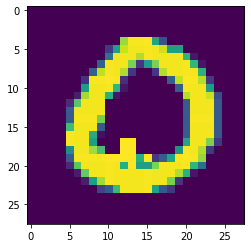

In [119]:
plt.imshow(tf.reshape(adversarials[0][sample], (28,28)))
print(np.argmax(model_to_attack(adversarials[0][sample])))
print('label = ',y_to_attack[sample].numpy())

0

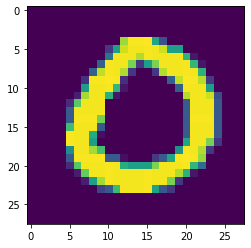

In [118]:
plt.imshow(tf.reshape(x_to_attack[sample], (28,28)))
np.argmax(model_to_attack(x_to_attack[sample]))

In [95]:
#lr 1e7
sum(dists)/1000

14.261

In [98]:
#lr 1e10
sum(dists)/1000

14.258

In [100]:
#lr 1e15
sum(dists)/1000

15.779

In [103]:
#lr 1e3 mit l0 dist datasetattack
sum(dists)/1000

18.635

In [105]:
#lr 1e3
sum(dists)/1000

16.218

In [103]:
#lr 1e7 mit l0 dist datasetattack
sum(dists)/1000

18.635

In [107]:
#lr 1e7 mit l2 dist datasetattack
sum(dists)/1000

15.352

In [110]:
#lr 1e7 mit 5000 steps 50 binary steps
sum(dists)/1000

15.402

In [112]:
#lr 1e5 mit 5000 steps 50 binary steps
sum(dists)/1000

15.19

In [114]:
#lr 1e3 mit 5000 steps 50 binary steps
sum(dists)/1000

14.014

In [121]:
#lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

15.332

In [123]:
#lr num decay=5, lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

16.215

In [125]:
#lr num decay=40, lr 1e3 mit 5000 steps 10 binary steps
sum(dists)/1000

11.85

In [127]:
#lr num decay=40, lr 1e7 mit 5000 steps 10 binary steps
sum(dists)/1000

13.066

In [12]:
#lr num decay=30, lr 1e3 mit 1000 steps 10 binary steps
sum(dists)/1000

9.63

In [14]:
#lr num decay=30, lr 1e2 mit 1000 steps 10 binary steps
sum(dists)/1000

10.005

In [16]:
#lr num decay=20, lr 1e4 mit 1000 steps 10 binary steps
sum(dists)/1000

8.635

In [18]:
#lr num decay=20, lr 1e4 mit 1000 steps 10 binary steps
sum(dists)/1000

8.667

In [20]:
#lr num decay=20, lr 1e4 mit 1000 steps 20 binary steps
sum(dists)/1000

8.0

In [22]:
#lr num decay=20, lr 1e5 mit 2000 steps 10 binary steps
sum(dists)/1000

8.125

In [24]:
#lr num decay=20, lr 1e5 mit 500 steps 30 binary steps
sum(dists)/1000

8.041

In [27]:
#lr num decay=20, lr 1e6 mit 500 steps 30 binary steps
sum(dists)/1000

7.655

In [29]:
#lr num decay=20, lr 1e7 mit 500 steps 30 binary steps
sum(dists)/1000

7.211

In [44]:
#lr num decay=40, lr 1e6 mit 500 steps 30 binary steps
sum(dists)/1000

8.208

In [31]:
#lr num decay=20, lr 1e7 mit 500 steps 40 binary steps
sum(dists)/1000

12.12

In [45]:
success

<tf.Tensor: shape=(1, 1000), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, 